# <center> <b>  Νευρώνικα Δίκτυα-Βαθία Μάθηση </b> </center>
## <center> <b>1η ΥΠΟΧΡΕΩΤΙΚΗ ΕΡΓΑΣΙΑ</b> </center>
### <center> <b>  Θεολόγης Γεώργιος </b>  , ΑΕΜ:10413 </center>

### <center> email: gtheolog@ece.auth.gr </center>

### <center> Τμήμα Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών </center>

Στη παρούσα εργασία έγινε η υλοποιήση ενός νευρωνικού δικτύου<u> <b> εμπόσθιας τροφοδότησης (feedforward NN)</b></u> το οποίο θα εκπαιδεύεται με Οπισθοδιάδοση (back propagation). Το νευρωνικό αυτό θα εκπαιδευτεί ώστε να είναι ικανό να λύνει προβλήματα κατηγοροποιήσης <u> <b> (classification) </b></u> πολλών κλάσεων. Το πνεύμα που ακολουθήθηκε κατά την εκπόνηση αυτής της εργασίας ήταν να γίνει δοκιμή πολλών μεθοδολογιών, πρακτικών και αρχιτεκτονικών νευρωνικού που παρασουιάστηκαν κατά την διάρκεια του μαθήματος αλλά και έπειτα από προσωπική αναζήτηση. Για αυτό τον λόγο εν τέλη έχουμε υλοποίησει κατά κύριο λόγο τα εξής:

* Νευρωνικό δίκτυο MLP υλοποιημένο με αντικειμενοστρεφής λογική με άμεση εφαρμογή της θεωρίας και δίχως χρήση έτοιμων modules (Python)
* Νευρωνικό δίκτυο MLP με χρήση nn Module της Pytorch (Python)
* Νευρωνικό δίκτυο CNN με χρήση nn Module της Pytorch (Python)

Σε αυτά τα νευρωνικά χρησιμοποιήθηκαν πολλές από τις μεθόδους 
cross-validation , neuron-pruning, layer-dropout, 

Ο κώδικας υλοποιήθηκε έχοντας ως βάση τα tensor της βιβλιοθήκης torch. Με την χρήση των tensor μπορούμε να πραγματοποίησουμε της απαιτούμενες πράξεις στην GPU του υπολογιστή μας και συνεπώς να μειώσουμε τον χρόνο εκτέλλεσης παραλληλοποιόντας την διαδικασία.

Η εφαρμογή των αλγορίθμων έγινε στην βάση δεδομένων CIFAR-10

### Εισαγωγή απαραίτητων βιβλιοθηκών.

In [1]:
import torch                            #PyTorch για χρήση tensor
import numpy as np                      #numpy για πράξεις με arrays
import pandas as pd
import matplotlib.pyplot as plt         #για εύχρηστα plots
from sklearn.decomposition import PCA   #Principal Component Analysis της sklearn
from sklearn.preprocessing import StandardScaler #Για γρήγορο scaling των δεδομένων της βάσης βοηθάει στην καλλήτερη εφαρμογή του PCA
import itertools


from torch import nn                    #Για χρήση του neural network module της PyTorch


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device that is used for tensor computations: {device}")

Device that is used for tensor computations: cuda


In [5]:
!pip install cuml-cu11


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [57 lines of output]
      INFO:nvidia-stub:Testing wheel cuml_cu11-24.10.0-cp310-cp310-manylinux_2_28_aarch64.whl against tag cp310-cp310-manylinux_2_28_aarch64
      INFO:nvidia-stub:Testing wheel cuml_cu11-24.10.0-cp310-cp310-manylinux_2_28_x86_64.whl against tag cp310-cp310-manylinux_2_28_x86_64
      INFO:nvidia-stub:Testing wheel cuml_cu11-24.10.0-cp311-cp311-manylinux_2_28_aarch64.whl against tag cp311-cp311-manylinux_2_28_aarch64
      INFO:nvidia-stub:Testing wheel cuml_cu11-24.10.0-cp311-cp311-manylinux_2_28_x86_64.whl against tag cp311-cp311-manylinux_2_28_x86_64
      INFO:nvidia-stub:Testing wheel cuml_cu11-24.10.0-cp312-cp312-manylinux_2_28_aarch64.whl against tag cp312-cp312-manylinux_2_28_aarch64
      INFO:nvidia-stub:Testing wheel cuml_cu11-24.10.0-cp312-cp312-manylinux_2_28_x86_64.whl against tag cp312-cp312-manylinux_2_28_x86_64
        F

## <center> Εισαγωγή της βάσης δεδομένων CIFAR-10 </center>

Aρχικά θα ελέγξουμε τους αλγορίθμους που αναπτύχθηκαν στην βάση δεδομένων CIFAR-10. Μπορούμε να βρούμε αυτή την βάση δεδομένων στην σελίδα: https://www.cs.toronto.edu/~kriz/cifar.html

Η βάση δεδομένων CIFAR-10 περιέχει εικόνες που αντιστοιχούν σε 10 κλάσεις οντοτήτων (airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck)
Τα labels των δεδομένων έχουν αντιστοιχίσει την κάθε τάξη σε ένα νούμερο από 0-9 με τον ακόλουθο τρόπο:
* ariplane= <b> 0</b>
* automobile= <b> 1</b>
* bird= <b> 2</b>
* cat= <b> 3</b>
* deer= <b> 4</b>
* dog= <b> 5</b>
* frog= <b> 6</b>
* horse= <b> 7</b>
* ship= <b> 8</b>
* truck= <b> 9</b>

Τα data δεδομένα περιέχουν 60000 εικόνες , 6000 για κάθε κλάση. Κάθε εικόνα έχει μέγεθος 3072 (32*32=1024 pixels και 3 color channels).

Ακολουθεί η εισαγωγή των δεδομένων των εικονών (data) και των ετικετών τους (labels):

In [3]:
def unpickle(file): #συνάρτηση για αποκρυπτογράφηση των αρχείων
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:

dt1=unpickle("C:\\CIFAR\\cifar-10-batches-py\\data_batch_1") #data_batch_1 to dt1
dt2=unpickle("C:\\CIFAR\\cifar-10-batches-py\\data_batch_2") #data_batch_2 to dt2
dt3=unpickle("C:\\CIFAR\\cifar-10-batches-py\\data_batch_3") #data_batch_3 to dt3
dt4=unpickle("C:\\CIFAR\\cifar-10-batches-py\\data_batch_4") #data_batch_4 to dt4
dt5=unpickle("C:\\CIFAR\\cifar-10-batches-py\\data_batch_5") #data_batch_5 to dt5
dtest=unpickle("C:\\CIFAR\\cifar-10-batches-py\\test_batch") #test_batch to dtest

In [5]:
#εισαγωγή των δεδομένων σε μορφή tensor. Εύκολα μπορούν να μετασχηματιστούν στην συνέχεια σε Numpy arrays.
data_train_cifar10= torch.cat((torch.tensor(dt1[b'data'], dtype=torch.float32),torch.tensor(dt2[b'data'], dtype=torch.float32),torch.tensor(dt3[b'data'], dtype=torch.float32),torch.tensor(dt4[b'data'], dtype=torch.float32),torch.tensor(dt5[b'data'], dtype=torch.float32)), dim=0)
label_train_cifar10=torch.cat((torch.tensor(dt1[b'labels'], dtype=torch.long),torch.tensor(dt2[b'labels'], dtype=torch.long),torch.tensor(dt3[b'labels'], dtype=torch.long),torch.tensor(dt4[b'labels'], dtype=torch.long),torch.tensor(dt5[b'labels'], dtype=torch.long)), dim=0)

data_test_cifar10=torch.tensor(dtest[b'data'], dtype=torch.float32)
label_test_cifar10=torch.tensor(dtest[b'labels'], dtype=torch.long)

data_train_cifar10_np=np.vstack((dt1[b'data'],dt2[b'data'],dt3[b'data'],dt4[b'data'],dt5[b'data']))
data_test_cifar10_np=np.array(dtest[b'data'])

label_train_cifar10_np=np.hstack((dt1[b'labels'],dt2[b'labels'],dt3[b'labels'],dt4[b'labels'],dt5[b'labels']))
label_test_cifar10_np=np.array(dtest[b'labels'])




<center> Principal Components Analysis on CIFAR-10 </center>

Με την Ανάλυση Κύριων Συνιστωσών (PCA) μπορούμε να προ-επεξεργαστούμε τις εικόνες κατάλληλα ώστε να μειώσουμε την διάσταση των γνωρισμάτων των συνόλων εκπαίδευσης και ελέγχου. Η μείωση αυτή της διάστασης των γνωρισμάτων των δεδομένων τα βάση των οποίων θα ταξινομήσουμε τις εικόνες μας συμφέρει αρκετά καθώς μειώνεται το πλήθος των υπολογισμών και η πολυπλοκότητα στην ταξινόμηση. Επίσης κατά αυτήν την διαδικασία κάθε γνώρισμα που προκύπτει τείνει να είναι γραμμικά ασυσχέτιστο από τα άλλα και να συγκεντρώνει μεγαλύτερη ποσότητα χρήσιμης πληροφορίας δημιουργώντας ένα πιο ουσιαστικό feature space.

Θα χρησιμοποιήσουμε τις έτοιμες κλάσεις StandardScaler και PCA για να κανονικοποίση των δεδομένων (μέση τιμή=0 και τυπική απόκλιση=1) και ανάλυση κυριών συνιστωσών αντίστοιχα.

In [25]:
#Ενδεικτίκα για PCA ανάλυση το
scaler = StandardScaler()
pca = PCA(n_components=40)  # Κρατώ 40 κύριες συνιστώσες

#Κάνουμε scale τα training data. Κρατάμε τον scaler που προκύπτει μόνο από το fit στα training data. Αντίστοιχα κάνουμε PCA μετασχηματισμό στα training data και αποθηκεύουμε τους πίνακες του μετασχηματισμού για να εφαρμοστούν έπειτα στα test data.
data_train_np=data_train_cifar10.numpy().astype(np.float32)  
data_train_scaled = scaler.fit_transform(data_train_np)  
data_train_scaled_tensor=torch.from_numpy(data_train_scaled).to(torch.float32)
data_train_pca_np = pca.fit_transform(data_train_scaled)


#scaling και pca μετασχηματισμός χρησιμοποιώντας τα μεγέθη και πίνακες που προέυκυψαν από τα training data
data_test_np=data_test_cifar10.numpy().astype(np.float32)
data_test_scaled = scaler.transform(data_test_np)
data_test_scaled_tensor=torch.from_numpy(data_test_scaled).to(torch.float32)
data_test_pca_np = pca.transform(data_test_scaled)

data_train_pca=torch.from_numpy(data_train_pca_np).to(torch.float32)
data_test_pca=torch.from_numpy(data_test_pca_np).to(torch.float32)

Και μια συνάρτηση για να απεικονίζουμε στο notebook τις εικόνες του data base.

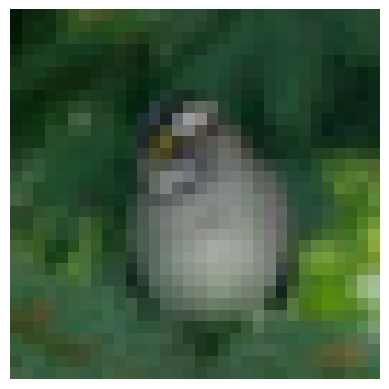

2


In [7]:
def show_cifar_image(image, label=None):
    # Reshape the 3072 array into a (32, 32, 3) format
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)  
    plt.imshow(image)
    if label is not None:
        plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

show_cifar_image(data_test_cifar10_np[900])
print(label_test_cifar10_np[900])

### Συναρτήσεις για <b><u> αποθήκευση</u>  </b> και <b> <u>  φόρτωση </u> </b>  μοντέλου νευρωνικού βασισμένου στο module nn της Pytorch

In [8]:
#Χρησιμοποίησα αυτή την συνάρτηση για να σώσω σε μορφή txt την αρχιτεκτονική καθώς και τα βάρη του μοντέλου ενός νευρωνικού δικτύου βασισμένου στο nn module της PyTorch
def save_model_txt(model,model_name):
    with open(f"C:\\neural\\model_{model_name}.txt", 'w') as f:
        # Save architecture
        f.write("Model Architecture:\n")
        f.write(str(model))
        f.write("\n\n")
        # Save weights
        f.write("Model Weights:\n")
        for name, param in model.state_dict().items():
            f.write(f"{name}:\n{param.tolist()}\n")


In [9]:
#Σώζεται το νευρωνικό σε δομή του dictionary 
def save_model_dict(model,model_name): 
    torch.save(model.state_dict(), f"C:\\neural\\model_{model_name}.pth")


In [10]:
#Φορτώνεται το μοντέλο από την δομή dictionary που είχε αποθηκευθεί
def load_model(model_name):
    loaded_model =torch.load( f"C:\\neural\\model_{model_name}.pth",weights_only=True)
    return loaded_model

## Ανακεφαλαίωση για ποσοστά επιτυχίας της CIFAR-10 στον classifier K-NN και Nearest Centroid της ενδιάμεσης εργασίας
Ακολουθεί μια σύνοψη των αποτελεσμάτων της ενδιάμεσης εργασίας. Συγκεκριμένα είναι τα ποσοστά επιτυχούς κατηγοριοποίησης των δεδομένων ελέγχου (test-data απο test_batch) μέσω ταξινομητών πλησιέστερου γείτονα (Nearest Neighbout με 1-nn έναν πλησιέστερο γείτονα και 3-nn 3 πλησιέστερους γείτονες) και του πλησιέστερου κέντρου κλάσης (Nearest Centroid).

-Εφαρμογή για τα 3072 raw γνωρίσματα των εικονών του database

**1-nn**: 35.39 %

**3-nn**: 33.03 % 
 
**centroid**: 27.74%  

-Εφαρμογή σε PCA με 50 κύριες συνιστώσες των εικονών του database.

**1-nn**: 38.94 %

**3-nn**: 38.11 % 
 
**centroid**: 27.95%  


Θα δούμε στη συνέχεια την ικανότητα των νευρωνικών δικτύων να ξεπερνάνε αυτά τα ποσοστά επιτυχίας που έχουν ορίσει οι ταξινομητές Πλησιέστερου Γείτονα και Πλησιέστερου Κέντρου είτε στην πλήρη εικόνα με τα raw features(3072 features ) είτε μετά από την μείωση της διάστασης των γνωρισμάτων (πρακτικά την διάσταση των δεδομένων) με χρήση PCA

## <center> Νευρώνικο Δίκτυο MLP χωρίς χρήση nn Module</center>

### Συναρτήσεις για την λειτουργία του MLP νευρωνικού δικτύου που αναπτύχθηκε απο φοιτητή.

Ακολοθούν συναρτήσεις οι οποίες είναι απαραίτητες για την λειτουργία του MLP νευρωνικού που αναπτύχθηκε με δικό μας κώδικα και χωρίς την χρήση του nn Module της Pytorch.

In [11]:
one_hot_encoded=torch.eye(10).to(device) #Δημιουργούμε έναν πίνακα όπου οι γραμμές του είναι η one hot encoded αναπαράσταση label της CIFAR-10. Δηλαδή η ετικέτα 0 αντιστοιχεί στην πρώτη γραμμή

In [12]:
#Συνάρτηση που υπολογίζει την απώλεια διασταυρωμένης εντροπίας έχοντας ως είσοδο την softmax έξοδο του νευρωνικού για ένα batch δειγμάτων και τα πραγματικά label αυτών των δειγμάτων.
def Cross_Entropy_Loss(soft_out,label_test):
    logp=torch.log(soft_out)
    #one_hot_encoded[label_test] φτιάχνεται len(label_test)x10 tensor οπού κάθε γραμμή είναι το οne hot encoded version του label
    losses=-torch.sum(logp * one_hot_encoded[label_test], dim=1) #το αποτέλεσμα είναι γραμμη επι γραμμή εσωτερικό γινόμενο ώστε να προκύψει 1D Tensor
    return torch.mean(losses)  #Μέσος όρος απώλειας για όλα τα δείγματα του batch.


Η split_shuffle παίρνει ως όρισμα το μέγεθος ενός πίνακα/tensor και αριθμό batches και παράγει μια λίστα πινάκων από indexes βάσει των οποίων ένα Tensor (συγκεκριμένα το data_train,label_train) θα σπάσει σε batches πλήθους num_batches. Κάθε φορά που καλείται κάνει τον διαμοιρασμό με διαφορετικό τρόπο. Έτσι, αποτρέπουμε το νευρωνικό να εκπαιδευτεί στο μοτίβο-σειρά με την οποία έρχονται τα δεδομένα.

In [13]:
def split_shuffle(size,num_batches): 
    range_start = 0
    range_end =size
    #Δημιουργώ Πίνακα 
    indices = np.arange(range_start, range_end)
    np.random.shuffle(indices)

    #Σπάω 
    shuffled_list = np.array_split(indices, num_batches)
    return shuffled_list


Υπολόγισμος Ακρίβειας ως προς την κατηγοριοποίηση των δειγμάτων (δηλαδή την ανάθεση τους σε μια κλάση label_pred από το νευρωνικό) συγκρίνοντας τις ετικέτες που απέδωσε το νευρωνικό δίκτυο στα δείγματα (label_pred) με τις πραγματικές ετικέτες-κλάσεις που αντιστοιχούν σε αυτά (label_test).

In [14]:
def accuracy(label_pred,label_test):
        arr_of_error=label_pred-label_test
        num_zeros = torch.count_nonzero(arr_of_error==0)
        accuracy=num_zeros/len(label_test)*100
        return accuracy

Υπολογισμός ακρίβειας αλλά και ποσοστού επιτυχίας ανά κλάση. Η εφαρμογή της γίνεται στα δεδομένα ελέγχου και θέλει να δεί πέρα από την συνολική επιτυχία και το ποσοστό επιτυχίας που είχε το νευρωνικό στο να κατηγοροποιεί σωστά κάθε κλάση.

In [15]:
def accuracy_and_class_torch(label_test, label_pred):
    correct_indices = (label_test == label_pred).nonzero(as_tuple=True)[0]
    correct_count = correct_indices.numel() 
    accuracy = correct_count / label_test.size(0) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    unique_elements, counts = torch.unique(label_test[correct_indices], return_counts=True)
    success_per_class = counts.float() / 10  #*100/1000 όπου 1000 εικόνες ανά κλάση στα δεδομένα ελέγχου.
    column_names = ['Airplane', 'Automobile', 'Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
    sc = success_per_class.cpu().tolist()
    df = pd.DataFrame([sc], columns=column_names).round(2)
    print("Success of each classification: ")
    display( df)



S.O.S. Αξιοποιούμε πρακτικά το test_batch /test_data της CIFAR-10 για VALIDATION (Eπικύρωση) και όχι για έλεγχο. Όπου αναφέρεται στο υπόλοιπο report η ορολογία διαδικασία ελέγχου και γενικά test αναφερόμαστε στο validation.

In [16]:
#Για εκπαίδευση και αξιολόγηση του νευρωνικού.
def my_train_test_func(my_nn,num_batches,epochs,data_train,data_test,label_train,label_test):
    ltr_acc=[]
    ltr_loss=[]
    lts_acc=[]
    lts_loss=[]
    for epoch in range(epochs):
        shuffled_list=split_shuffle(len(data_train),num_batches) #σπάσιμο σε batches
        mean_acc=0
        mean_loss=0
        for k in range(len(shuffled_list)):
            torch.cuda.empty_cache()
            l_soft_array=my_nn.forward(data_train[shuffled_list[k]])  #Forward Πέρασμα
            my_nn.backward(l_soft_array,label_train[shuffled_list[k]]) #Οπισθοδιάδοση
            l_pred=torch.argmax(l_soft_array,dim=1)
            testlist=label_train[shuffled_list[k]]-torch.tensor(l_pred)
            count=torch.sum(testlist == 0).item()
            mean_acc+=count/len(testlist)*100
            mean_loss+=Cross_Entropy_Loss(l_soft_array,label_train[shuffled_list[k]])
        mean_acc=mean_acc/num_batches
        ltr_acc.append(mean_acc)
        mean_loss=mean_loss/num_batches
        ltr_loss.append(mean_loss)

        l_soft_array=my_nn.forward(data_test)
        my_nn.backward(l_soft_array,label_test)
        l_pred=torch.argmax(l_soft_array,dim=1)
        testlist=label_test-torch.tensor(l_pred)
        count=torch.sum(testlist == 0).item()
        test_acc=count/len(testlist)*100
        lts_acc.append(test_acc)
        test_loss=Cross_Entropy_Loss(l_soft_array,label_test)
        lts_loss.append(test_loss)

        if epoch%10==0:
            print(f"Epoch: {epoch} | Train Loss: {mean_loss:.5f}, Train Accuracy: {mean_acc:.2f}% |Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}% ")
    return ltr_loss,lts_loss,ltr_acc,lts_acc    

In [17]:
#Για Plotting και τελική αξιολόγηση με set ελέγχου.
def my_tt_plot(my_nn,num_batches,epochs,data_train,data_test,label_train,label_test):
    ltr_loss,lts_loss,ltr_acc,lts_acc=my_train_test_func(my_nn,num_batches,epochs,data_train,data_test,label_train,label_test)

    ltr_loss_cpu=[loss.cpu().item() for loss in ltr_loss]
    lts_loss_cpu = [loss.cpu().item() for loss in lts_loss]
    ltr_acc_cpu=[loss for loss in ltr_acc]
    lts_acc_cpu = [loss for loss in lts_acc]

        # Plot the losses
    epoch_axis = np.arange(1, epochs + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(2,1,1)
    plt.plot(epoch_axis,ltr_loss_cpu, label="Train Loss by Epoch")
    plt.plot(epoch_axis,lts_loss_cpu, label="Test Loss by Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.subplot(2,1,2)
    plt.plot(epoch_axis,ltr_acc_cpu, label="Train Accuracy by Epoch")
    plt.plot(epoch_axis,lts_acc_cpu, label="Test Accuracy by Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

    label_pred=torch.argmax(my_nn.forward(data_test),dim=1)
    accuracy_and_class_torch(label_test,label_pred)


### Βασική Λειτουργία του Νευρωνικού Δικτύου

Είσοδος σε κάθε στρώμα-επίπεδο το διάνυσμα $\mathbf{x^{l}}$ με στοιχεία ίσα σε αριθμό με το πλήθος των νευρώνων του προηγούμενου επιπέδου n (ή αν βρισκόμαστε στο επίπεδο εισόδου είναι ίσα σε αριθμό με το πλήθος των εισόδων του νευρωνικού),  ενώ μπορούμε να ορίσουμε και το επαυξημένο διάνυσμα μήκους n+1 $\mathbf{X^{l}}=\begin{bmatrix} 1 \\ \mathbf{x^{l}} \end{bmatrix}$ που συμπεριλαμβάνει το στοιχείο $x^{l}_{0}=1$ που αντιπροσωπεύει το bias. Ο δείκτης l προσδιορίζει το layer (επίπεδο).



Ορίζουμε για το στρώμα το πίνακα συναπτικών βαρών $\mathbf{w^{l}}$ ο οποίος έχει γραμμές όσες και οι νευρώνες του επιπέδου (m) και στήλες όσες και οι εισόδοι στο επίπεδο (n). Παράλληλα ορίζουμε και το διάνυσμα πόλωσης $\mathbf{b^{l}}$ που είναι διάνυσμα στήλη μήκους m. Μπορούμε να συνδιάσουμε τα $\mathbf{w^{l}},\mathbf{b^{l}}$ στον επαύξημενο πίνακα διάστσης m x (n+1):
$$\mathbf{W^{l}}=\begin{bmatrix} \mathbf{b^{l}} & \mathbf{w^{l}} \end{bmatrix} $$
Στη συνέχεια μπορούμε να ορίσουμε το διάνυσμα του δυναμικού ενεργοποίησης στο επίπεδο l :

$$\mathbf{v^{l}}=\mathbf{w^{l}x^{l}}+\mathbf{b^{l}}$$
$$\mathbf{v^{l}}=\mathbf{W^{l}X^{l}}$$


Αυτό το διάνυσμα το αποκαλούμε και διάνυσμα logits έτσι ώστε να υπάρχει συμβατότητα και με την ορολογία της PyTorch. Κάθε στοιχείο του διανύσματος αφορά την μετασχηματισμένη απο τα βάρη και την πόλωση (bias) είσοδο σε κάθε νευρώνα του επιπέδου πριν την συνάρτηση ενεργοποίησης του νευρώνα. Ορίζοντας και την συνάρτηση ενεργοποίησης $\phi^{l}$ των νευρώνων του επιπέδου l , παίρνουμε το διάνυσμα εξόδου του επιπέδου (layer):
$$\mathbf{y^{l}}=\phi^{l}(\mathbf{v^{l}})$$


### Συντομή Μαθηματική Ανάλυση για την Οπισθοδιάδοση (Back Propagation) και την εφαρμογή της στο κώδικα του νευρωνικού που αναπτύχθηκε


Καθώς εκπαιδεύουμε το νευρωνικό δίκτυο ώστε αυτό να επιλύει πρόβλημα κατηγοροποίησης με 10 κλάσεις (CIFAR-10) , η μετρική που πρέπει να χρησιμοποίησουμε για να χαρακτηρίσουμε την έννοια της απώλειας πρέπει να χρησιμοποιήσουμε την Cross Entropy Loss (Απώλεια Διασταυρούμενης Εντροπίας) η οποία είναι η συνιστώμενη συνάρτηση απώλειας για multi-class προβλήματα. Ακολουθεί η μαθηματική προσέγγιση και η περιγραφή του προβλήματος βελτιστοποίησης. Θα γενικευθεί η ανάλυση ώστε να μην αφορά μονο προβλήμα 10 κλάσεων αλλά ένα γενικότερο C κλάσεων.

Καταρχάς ορίζουμε την συνάρτηση Softmax:

$$\mathbf{s}=Softmax(\mathbf{z})$$

$$s_{i}=s(\mathbf{z})_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{C}e^{z_{j}}}$$

Η softmax εφαρμόζεται στα logits του επιπέδου εξόδου του νευρωνικού ($\mathbf{z}=\mathbf{v^{out}}$) , έτσι ώστε να φέρει την έξοδο του νευρωνικού σε μορφή κατανομής διακριτής τυχαίας μεταβλητής. Δηλαδή το si της κάθε εξόδου έχει τιμή από το 0 εως το 1 και το άθροισμα όλων των εξόδων είναι ίσο με την μονάδα. Μια έξοδος με μεγαλύτερο logit από μια άλλη θα έχει μεγαλύτερο si από αυτή και επομένως θα χαρακτηρίζεται ότι είναι πιο "πιθανή". Κάθε έξοδος αντιστοιχίζεται σε μια τάξη και επομένως με τις τιμές του softmax παίρνουμε μια εκτίμηση της πιθανότητας ενός συγκρεκριμένου δείγματος στην είσοδο του νευρωνικού να ανήκει σε κάποια κλάση. Η έξοδος με την υψηλότερη τιμή παίρνει και την μεγαλύτερη softmax πιθανότητα και αντιπροωπεύει την κλάση στην οποία κατατάσσουμε-προβλέπουμε (predict) ότι ανήκει το δείγμα που εφαρμόστηκε στην είσοδο του νευρωνικού. 

Έχοντας περιγράψει την έξοδο $\mathbf{s}$ του νευρωνικού ορίζουμε την Απώλεια Διασταυρούμενης Εντροπίας:

$$L_{sample}=-\sum_{i=1}^{C}y_{i}log(s_{i})$$


Όπου $\mathbf{y}$ η hot encoded κωδικοποιήση της πραγματικής ετικέτας κλάσης του αντικειμένου. Δηλαδή, αν το αντικείμενο ανήκει στην κλάση 0 και C=3 τότε το $\mathbf{y}=[1\ \ 0\ \ 0]$.
Άρα αν η κατηγοριοποιήση του αντικειμένου έγινε σωστά (π.χ. κλάση 0 είναι το αποτέλεσμα του ταξινομητή αλλά και η πραγματική ετικέτα) τοτε το loss είναι ίσο με $L_{sample}=-log(s_{0})$. Προφανώς γίνεται ίσο με μηδέν μονάχα αν $s_{0}=1$ πράγμα που σημαίνει ότι η έξοδος του νευρωνικού μετά το softmax πρέπει να δίνει μονάδα μόνο στην έξοδο που αντιστοιχεί στην σωστή κλάση και σε όλες τις άλλες να τις έχει μηδενικές. 

Σκοπός της εκπαίδευσης είναι να βρεθούν τα συναπτικά βάρη του νευρωνικού που ελαχιστοποιούν αυτην την απώλεια για όλα τα δείγματα που χρησιμοποίηθηκαν στην εκπαίδευση. Καθώς , το L εξαρτάται από τα συναπτικά βάρη , για να μπορέσουμε να βρούμε έναν αναδρομικό αλγόριθμο εκτίμησης των βελτιστών βαρών πρέπει να βρεθούν οι παράγωγοι:
$$\frac{\partial L}{\partial w_{ji}^{l}}$$

Αποδεικνύεται ότι (παραπομπή 1):
$$\frac{\partial L}{\partial z_{j}}=s_{j}-y_{j}$$

$$\frac{\partial L}{\partial \mathbf{z}}=\frac{\partial L}{\partial \mathbf{s}}\frac{\partial \mathbf{s}}{\partial \mathbf{z}}=\mathbf{s-y}$$

Και με εφαρμογή του κανόνα της αλυσίδας έχουμε:
$$\frac{\partial L}{\partial w_{ji}^{l}}=(\frac{\partial L}{\partial \mathbf{s}}\frac{\partial \mathbf{s}}{\partial \mathbf{z}})^{T}\frac{\partial \mathbf{z}}{\partial  w_{ji}^{l}}=(\mathbf{s-y})^{T}\cdot \begin{bmatrix} \frac{\partial z_{1}}{\partial  w_{ji}^{l}}\\ .. \\ \frac{\partial z_{C}}{\partial  w_{ji}^{l}}\end{bmatrix}$$

Χρησιμοποιούμε την σήμανση του Haykin οπού j είναι ο κόμβος στο layer που μελετάω τώρα και στο οποίο ανήκει το βάρος, ενώ i είναι ο νευρώνας του προηγούμενου στρώματος layer ο οποίος συμμετέχει στην διέργεση του j νευρώνα μέσω του συναπτικού βάρους $w_{ji}$.

Για δεδομένη έξοδο $z_{k}$ ενός νευρώνα στο επίπεδο εξόδου έχουμε $\frac{\partial z_{k}}{\partial  w_{ji}^{l}}$ . Σε αυτό το σημείο η παράγωγος μπορεί να αναλυθεί επ ακριβώς σύμφωνα με την μεθοδολογία που περιγράφεται στο βιβλίο του Haykin.

Στην περίπτωση που το l είναι το layer εξόδου τότε $\frac{\partial z_{k}}{\partial  w_{ki}^{out}}=\frac{\partial \mathbf{W^{out}_{k}\cdot X^{out}}}{{\partial  w_{ki}^{out}}}=x^{out}_{i}$

$$\frac{\partial L}{\partial w_{ki}^{out}}=(s_{k}-y_{k})x^{out}_{i}$$
Η σχέση αυτή είναι ισοδύναμη με την (4.8) και το πόρισμα της (4.15) του βιβλίου του Haykin καθώς στο στρώμα εξόδου μπορούμε να θεωρήσουμε ταυτοτική συνάρτηση ενεργοποιήσης (φ(v)=v) και συνεπώς μοναδιαία παράγωγο ενώ ως σφάλμα $e_{k}$ έχουμε αναλογικά το $s_{k}-y_{k}$ και ως είσοδο στον νευρώνα του επιπέδου εξόδου k το $x^{out}_{i}=y_{i}$. Συμβολίζουμε ως Χ το διάνυσμα εισόδου στο επίπεδο (άρα διάνυσμα εξόδου του προηγούμενου στρώματος μετά την ενεργοποίηση ισοδύναμα).

Άρα οι τοπικές κλίσεις στους νευρώνες εξόδους είναι ίσες με $\delta_{k}^{out}=s_{k}-y_{k}$. Εφόσον, υπολογίσουμε τις παραγώγους μεταβολής της συνάρτησης απώλειας-σφάλματος L ως προς τα συναπτικά βάρη του επιπέδου-στρώματος εξόδου η διαδικασία οπισθοδιάδοσης στα πίσω (κρυφά) στρώματα  είναι ακριβώς αυτή που περιγράφεται στο βιβλίο του Haykin.

Δηλαδή, ορίζονται οι τοπικές κλίσεις για κρυφό νευρώνα j στρώματος l :

$$\delta^{l}_{j}=\phi^{l\ '}_{j}(v_{j})\sum_{m} \delta^{l+1}_{m}w^{l+1}_{mj}$$

Όπου $\phi^{l}(v)$ η συνάρτηση ενεργοποίησης του στρώματος l και $v_{j}=\mathbf{W^{l}_{j}\cdot X^{l}} $. Το δυάνυσμα $W^{l}_{j}$ έχει $w_{0}=b^{l}_{j}$ και της εισόδου $X^{l}$ έχει $x^{l}_{0}=1$ ώστε να συμπεριλαμβάνεται το bias σε αυτό το εσωτερικό γινομένο των $W^{l}_{j}\cdot X^{l}$. Μαζεύοντας τις περιπτώσεις για το στάδιο 


$$ \delta^{l}_{j}=\begin{cases} 
s_{k}-y_{k} & \text{Επίπεδο Εξόδου } \\ 
\phi^{l\ '}_{j}(v_{j})\sum_{m} \delta^{l+1}_{m}w^{l+1}_{mj} & \text{Κρυφό Επίπεδο}
\end{cases}$$





$$\frac{\partial L}{\partial w_{ji}^{l}}=\delta^{l}_{j}x^{l}_{i}$$
Καθώς , πραγματοποιούμε βελτιστοποίηση με την μέθοδο Stohastic Gradient Descent ορίζοντας learning rate η έχουμε:

$$\Delta w^{l}_{ji}=-\eta \frac{\partial L}{\partial w_{ji}^{l}}$$

Και έτσι με αριθμητική επίλυση δημιουργούμε την ακολουθία συναπτικών βαρών για κάθε n στιγμή εκπαίδευσης-οπισθοδιάδοσης:
$$w^{l}_{ji}(n+1)=w^{l}_{ji}(n)-\eta \frac{\partial L}{\partial w_{ji}^{l}}(n)$$

Προσθέτοντας όρο ορμής (και παράμετρο ορμής α) έχουμε την εξής σχέση:
$$\Delta w^{l}_{ji}(n)=a\Delta w^{l}_{ji}(n-1)-\eta \frac{\partial L}{\partial w_{ji}^{l}}(n)$$
$$w^{l}_{ji}(n+1)=w^{l}_{ji}(n)+a\Delta w^{l}_{ji}(n-1)-\eta \frac{\partial L}{\partial w_{ji}^{l}}(n)$$

Καθώς στην συνέχεια θα πραγματοποιηθεί μονάχα batch training , η μέθοδος βελτιστοποίησης που θα χρησιμοποιηθεί είναι η SGD (Stohastic Gradient Descent) κατα την οποία στόχος είναι να ελαχιστοποιηθεί το μέσο loss Lavg  για όλο το batch και αφού σε κάθε batch θα έχουμε Ν δείγματα ισχυεί :

$$L_{avg}=\frac{\sum_{i=1}^{N} L_{i}}{N}$$

Και επομένως ο κανόνας αλλαγής των συναπτικών βαρών αλλάζει σε:
$$\Delta w^{l}_{ji}(n)=a\Delta w^{l}_{ji}(n-1)-\eta \frac{\sum_{i=1}^{N} \frac{\partial L_{i}}{\partial w_{ji}^{l}}(n)}{N}$$
$$w^{l}_{ji}(n+1)=w^{l}_{ji}(n)+a\Delta w^{l}_{ji}(n-1)-\eta \frac{\sum_{i=1}^{N} \frac{\partial L_{i}}{\partial w_{ji}^{l}}(n)}{N}$$


Η επιλογή να χρησιμοποιηθεί η μαζική μάθηση (batch training) είναι σημαντική καθώς βοηθάει στην γρηγορή λειτουργία του αλγορίθμου (παράλληλοι υπολογισμοί για κάθε δείγμα του batch) και δίνει καλύτερη εκτίμηση του διανύσματος κλίσης από ότι η online μάθηση (εκπαίδευση ανά δείγμα). 

Παραπομπή 1: https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1 . Χρησιμοποιήσαμε τα πορίσματα αυτής της έτοιμης μαθηματικής ανάλυσης για την παράγωγο $\frac{\partial L}{\partial \mathbf{z}}$.

### Κώδικας για το νευρωνικό που υλοποιήσαμε χωρίς την χρήση nn Module της PyTorch (my_NN_tensor)

Ακολουθεί ο κώδικας για το νευρωνικό δίκτυο που κατασκευάσαμε χωρίς την χρήση έτοιμου nn Module αν και εμπνευστήκαμε και πήραμε πολλές ιδέες από το πως δομεί η Pytroch το νευρωνικό δίκτυο. 

Η λογική της υλοποίησης είναι αντικειμενοστρεφής καθώς ορίζουμε την κλάση my_NN_tensor τα αντικείμενα της οποίας θα αποτελούν τα μοντέλα-νευρωνικά δικτύα τα οποία θα εκπαιδεύσουμε ώστε να επιλύουν το πρόβλημα κατηγοριοποίησης της CIFAR-10. 
Κάθε αντικείμενο-Μοντέλο-Νευρωνικό Δίκτυο της my_NN_tensor ,περιέχει αντικείμενα της κλάσης Layer_Tensor οι οποίες αντιπροσωπεύουνε τα στρώματα του νευρωνικού δικτύου. 
Η εκπαίδευση του νευρωνικού δικτύου γίνεται καλώντας την μέθοδο forward για τον υπολογισμό της softmax εξόδου η οποία στη συνέχεια δίνεται μαζί με τα πραγματικά labels στην μέθοδο backwards η οποία καλώντας αναδρομικά την bp(back propagation) μέθοδο των layers-αντικειμένων εκτελεί την διαδικασία της οπισθοδιάδοσης.

Ο διαδικασία της οπισθοδιάδοσης λειτουργεί σύμφωνα με την μαθηματική ανάλυση που παρουσιάστηκε παραπάνω και έχει σχεδιαστεί έτσι ώστε να μπορούν να γίνουν οι υπολογισμοί για όλα τα δείγματα ενός batch παράλληλα ελαχιστοποιώντας τον χρόνο που απαιτεί το νευρωνικό για να εκπαιδευτεί.

In [18]:
#Συνάρτηση softmax για υπολογισμό των softmax πιθανοτήτων στο επίπεδο εξόδου του νευρωνικού.
def softmax_tensor(z):
    exp_z = torch.exp(z - torch.max(z, axis=-1, keepdims=True).values) #the torch.max(z) makes it safe numerically->the output is the same
    return exp_z / torch.sum(exp_z, axis=-1, keepdims=True)

#Κλάσεις Layer
class Layer_tensor:
    def __init__(self,in_feature,out_feature,learning_rate,mom,activation_fun,activation_dev):
        self.in_feauture=in_feature
        self.out_feauture=out_feature
        self.W = torch.randn(out_feature, in_feature) * torch.sqrt(1 / torch.tensor(in_feature)) #Αρχικοποίηση με κανονικοποιημένα βάρη.
        self.b = torch.randn(out_feature) * torch.sqrt(1 / torch.tensor(out_feature))   #Αρχικοποίηση με κανονικοποιημένη πόλωση.
        self.momentum= torch.zeros(out_feature, in_feature)
        self.momentumb=torch.zeros(out_feature)
        self.learning_rate=learning_rate
        self.mom=mom #Παράμετρος ορμής
        self.activation_fun=activation_fun #συνάρτηση ενεργοποίησης.
        self.activation_dev=activation_dev #παράγωγος της συνάρτησης ενεργοποίησης.
        self.call=callable(self.activation_dev)  #Ελέγχουμε άμα η παράγωγος της συνάρτησης ενεργοποίησης είναι η σταθερή συνάρτηση f(x)=1 ή όχι. Καθώς, περνάμε σαν όρισμα την 
                                                 #activation_dev στην περίπτωση που έχουμε activation_dev=1 (σταθερά) το γνωστοποιούμε έτσι ώστε να ξέρει 

    #για μεταφορά των tensors στην gpu
    def to(self, device):
        self.W  = self.W .to(device)
        self.b  = self.b .to(device)
        self.momentum=self.momentum.to(device)
        self.momentumb=self.momentumb.to(device)

        return self 
    #Forward Υπολογισμός Επιπέδου (Layer). Παίρνουμε το διάνυσμα εισόδου x και υπολογίζουμε το διάνυσμα εξόδου output
    def forward_layer(self,x): 
        self.in_layer=x #αποθηκεύω την είσοδο ώστε να χρηισμοποιηθεί στην οπισθοδιάδοση.
        self.v=torch.matmul(x, self.W.T) +self.b   #Υπολογισμός Wx+b (logit)
        output=self.activation_fun(self.v) #Συνάρτηση Ενεργοποίησης
        return output #Διάνυσμα εξόδου του επιπέδου.
    
    #Συνάρτηση οπισθοδιάδοσης για το layer
    def bp(self, error, layer_list, i):
       
        if self.call:
            delta = self.activation_dev(self.v) * error #η πράξη γίνεται element wise όποτε το σχετικό error στον νευρώνα πολλαπλασιάζεται με την παράγωγο της συνάρτησης ενεργοποίησης. 
        else:
            delta = error   #για το στρώμα εξόδου όπου πέρα από το softmax δεν έχω ενεργοποίηση όπως δείξαμε στην μαθηματική ανάλυση η φ'=1.

        err_of_prev = torch.matmul(delta, self.W)  #πολλαπλασιάζω τοπικές κλίσεις κατάλληλα με τα βάρη του κάθε batch.

        if delta.ndim > 1:      #σε περίπτωση batch training
            diff_w = torch.sum(delta.unsqueeze(-1) * self.in_layer.unsqueeze(1), dim=0) #πολλαπλασιάζω την είσοδο στο στρώμα κατά το forward pass με την τοπική κλίση
            delta_b = torch.sum(delta, dim=0)
            batch_size = delta.size(0)
        else:               #σε περίπτωση online training
            diff_w = torch.outer(delta, self.in_layer)
            delta_b = delta
            batch_size = 1
        
        #Μέσος όρος της κλίσης ΔW
        diff_w=-self.learning_rate*diff_w/batch_size
        diff_b=-self.learning_rate*delta_b/batch_size 
        temp=diff_w.clone()
        tempb=diff_b.clone()

        #Ενημέρωση συνναπτικών βαρών
        self.W = self.W +self.mom*self.momentum+diff_w   
        self.b = self.b +self.mom*self.momentumb+diff_b
        self.momentum=temp
        self.momentumb=tempb

        #Κρατάμε λογαριασμό σε ποίο Layer βρισκόμαστε.
        i = i - 1
        if i < 0:
            return #εφτάσες στο layer εισόδου. Δεν μπορείς να πας πιο πίσω
        else:
            layer_list[i].bp(err_of_prev, layer_list, i) #οπισθοδιάδοση στο προηγούμενο layer.
            
#Κλάση για Νευρωνικό Δίκτυο
class my_NN_tensor:
    def __init__(self,nl,lr,moment):
        self.layer_1 = Layer_tensor(in_feature=nl[0], out_feature=nl[1],learning_rate=lr,mom=moment,activation_fun=torch.relu,activation_dev=lambda x: (x > 0).float()) 
        self.layer_2 = Layer_tensor(in_feature=nl[1], out_feature=nl[2],learning_rate=lr,mom=moment,activation_fun=torch.relu,activation_dev=lambda x: (x > 0).float()) 
        self.layer_3= Layer_tensor(in_feature=nl[2], out_feature=nl[3],learning_rate=lr,mom=moment,activation_fun=softmax_tensor,activation_dev=1) 
        self.learning_rate=lr
        self.mom=moment
        self.layer_list=[self.layer_1,self.layer_2,self.layer_3]

        self.desired_hot_enc = torch.eye(10) 

    def forward(self, x): #Συνάρτηση για forward pass
        x=self.layer_1.forward_layer(x)
        x=self.layer_2.forward_layer(x)
        return self.layer_3.forward_layer(x)  

    def backward(self, soft_preds, labels): #Συνάρτηση για Οπισθοδιάδοση
        batch_size = soft_preds.shape[0]
        errors = soft_preds - self.desired_hot_enc[labels]
        self.layer_list[-1].bp(errors, self.layer_list, 2)
        
    #Για μεταφορά του αντικειμένου στην GPU
    def to(self, device):
        self.layer_1 = self.layer_1.to(device)
        self.layer_2 = self.layer_2.to(device)
        self.layer_3 = self.layer_3.to(device)

        self.desired_hot_enc =self.desired_hot_enc.to(device) #one hot encoded διανύσματα είναι απαραίτητα για την οπισθοδιάδοση.
        return self

## Εκπαίδευση του Νευρωνικού Δικτύου που αναπτύχθηκε από τoν φοιτητή (αντικείμενο της my_NN_tensor) στα δεδομένα της CIFAR-10

### <center> Εκπαίδευση σε PCA των δεδομένων της CIFAR-10 (40 principal components) </center>

C:\Users\george theologis\AppData\Local\Temp\ipykernel_30088\861328152.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testlist=label_train[shuffled_list[k]]-torch.tensor(l_pred)
C:\Users\george theologis\AppData\Local\Temp\ipykernel_30088\861328152.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testlist=label_test-torch.tensor(l_pred)


Epoch: 0 | Train Loss: 2.37262, Train Accuracy: 23.44% |Test Loss: 2.01979, Test Accuracy: 29.12% 
Epoch: 10 | Train Loss: 1.67321, Train Accuracy: 40.74% |Test Loss: 1.67663, Test Accuracy: 40.64% 
Epoch: 20 | Train Loss: 1.59184, Train Accuracy: 43.66% |Test Loss: 1.60886, Test Accuracy: 43.57% 
Epoch: 30 | Train Loss: 1.53960, Train Accuracy: 45.58% |Test Loss: 1.56769, Test Accuracy: 44.99% 
Epoch: 40 | Train Loss: 1.50033, Train Accuracy: 46.85% |Test Loss: 1.54501, Test Accuracy: 45.61% 
Epoch: 50 | Train Loss: 1.47038, Train Accuracy: 47.97% |Test Loss: 1.52656, Test Accuracy: 45.99% 
Epoch: 60 | Train Loss: 1.44536, Train Accuracy: 48.76% |Test Loss: 1.51267, Test Accuracy: 46.35% 
Epoch: 70 | Train Loss: 1.42382, Train Accuracy: 49.52% |Test Loss: 1.49967, Test Accuracy: 46.81% 
Epoch: 80 | Train Loss: 1.40662, Train Accuracy: 50.07% |Test Loss: 1.49672, Test Accuracy: 47.01% 
Epoch: 90 | Train Loss: 1.39188, Train Accuracy: 50.52% |Test Loss: 1.48721, Test Accuracy: 47.32% 
E

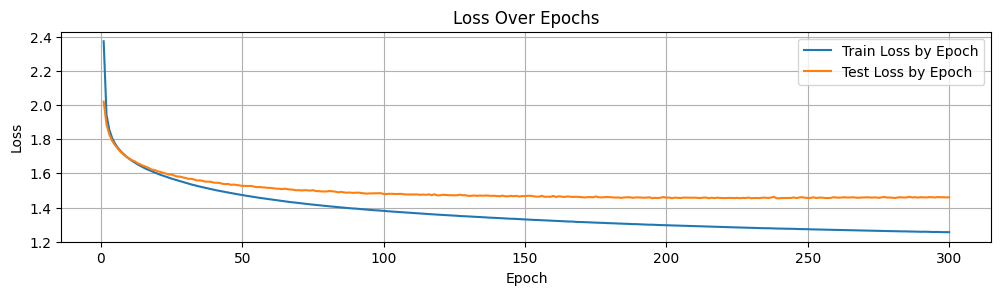

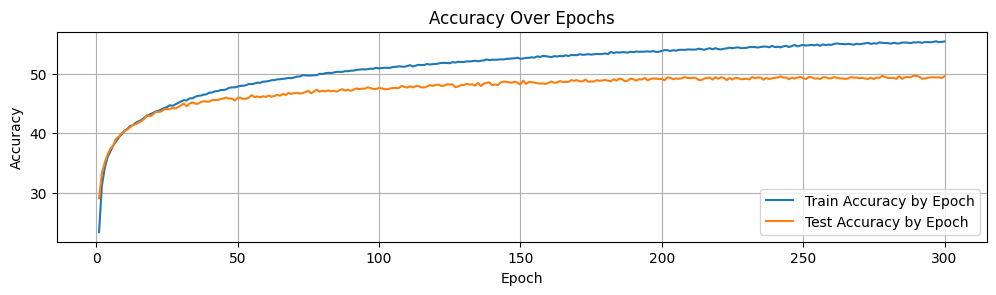

Accuracy: 49.54%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,58.0,54.0,35.7,29.0,42.6,40.9,56.2,56.4,65.7,56.9


In [ ]:
data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

nl=[40,80,50,10] #Καθορισμός των νευρώνων features εισόδου κάθε layer καθώς και nl[-1]=10 η έξοδοι του νευρωνικού.
epochs= 300
my_nn=my_NN_tensor(nl,0.001,0.8).to(device)
num_batches=1000 #50.000/1000=50 εικόνες/batch
my_tt_plot(my_nn,num_batches,epochs,data_train,data_test,label_train,label_test)



Χρόνος Εκπαίδευσης:3 λεπτά περίπου.

Γενικά παρατηρούμε εδώ ομώς και επανειλημμένα μέσα στις δοκιμές που θα γίνουν στην εργασία ότι οι εικόνες που απεικονίζουνε πλοία (ship) ταξινομούνται με μεγαλύτερη επιτυχία από το νευρωνικό δίκτυο (συνήθως <50%-60%) ενώ σχετικά υψηλά είναι και οι εικόνες που απεικονίζουν τα άλλα οχήματα (airplane,automobile,ship,truck). Μπορούμε να ερμηνεύσουμε την υψηλή απόδοση του ταξινομητή για την κλάση του πλοίου με την λογική ότι οι είκονες με τα πλοία έχουν στο background το μπλέ/γαλάζιο είτε της θάλασσας είτε του ουρανού. Αυτό είναι ένα μοτίβο που ενδεχομένως μαθαίνει το νευρωνικό και συμβάλλει στην πιο αποτελεσματική ταυτοποίηση των εικόνων με τα πλοία. Χαμηλότερη απόδοση γενικά φαίνεται να έχει στην κατηγοριοποίηση εικονών με γάτες. Ενδεχομένως η ποικιλία σε χρώματα αλλά και σε στάσεις του ζώου αυτού να δυσκολεύουν το νευρωνικό από το να βρεί μοτίβα που να ταυτοποιεί ορθά τις εικόνες γατών. Σε αντίθεση έχουμε ποίο υψηλή απόδοση σε εικόνες αλόγων και βατράχων αφού οι στάσεις τους στις εικόνες δεν παρουσιάζουν υψηλή ποικιλία (όπως άλλωστε γίνεται και στα οχήματα).

Το ποσοστό επιτυχίας στο classification των δειγμάτων του test-validation set της CIFAR-10 είναι κοντά στο 50 % ενώ ο αριθμός των εποχών που πραγματοποιείται η διαδικασία εκπαίδευσης είναι λίγες για να φανεί αν η παρατεταμένη εκπαίδευση θα οδηγούσε σε overfit. Όπως θα δούμε πολλές φορές στη συνέχεια το ποσσοτό επιτυχίας είναι μεγαλύτερο από αυτά που πέτυχαν οι ταξινομητές nearest neighbour και nearest centroid της ενδιάμεσης εργασίας καθώς κανένας από αυτούς δεν μας είχε δώσει ποσοστό επιτυχίας άνω του 40% για την cifar-10 (η της μειωμένης διάστασης dataset μετά την εφαρμογή PCA).


C:\Users\george theologis\AppData\Local\Temp\ipykernel_20388\861328152.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testlist=label_train[shuffled_list[k]]-torch.tensor(l_pred)
C:\Users\george theologis\AppData\Local\Temp\ipykernel_20388\861328152.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testlist=label_test-torch.tensor(l_pred)


Epoch: 0 | Train Loss: 2.34067, Train Accuracy: 25.41% |Test Loss: 1.97391, Test Accuracy: 31.06% 
Epoch: 10 | Train Loss: 1.61464, Train Accuracy: 42.80% |Test Loss: 1.63397, Test Accuracy: 42.18% 
Epoch: 20 | Train Loss: 1.53341, Train Accuracy: 45.53% |Test Loss: 1.57354, Test Accuracy: 44.42% 
Epoch: 30 | Train Loss: 1.48397, Train Accuracy: 47.29% |Test Loss: 1.53765, Test Accuracy: 45.49% 
Epoch: 40 | Train Loss: 1.44778, Train Accuracy: 48.41% |Test Loss: 1.51924, Test Accuracy: 46.06% 
Epoch: 50 | Train Loss: 1.41782, Train Accuracy: 49.69% |Test Loss: 1.50708, Test Accuracy: 46.63% 
Epoch: 60 | Train Loss: 1.39206, Train Accuracy: 50.57% |Test Loss: 1.49770, Test Accuracy: 47.09% 
Epoch: 70 | Train Loss: 1.37048, Train Accuracy: 51.23% |Test Loss: 1.49166, Test Accuracy: 47.24% 
Epoch: 80 | Train Loss: 1.35114, Train Accuracy: 52.09% |Test Loss: 1.48272, Test Accuracy: 47.90% 
Epoch: 90 | Train Loss: 1.33317, Train Accuracy: 52.74% |Test Loss: 1.48136, Test Accuracy: 48.33% 


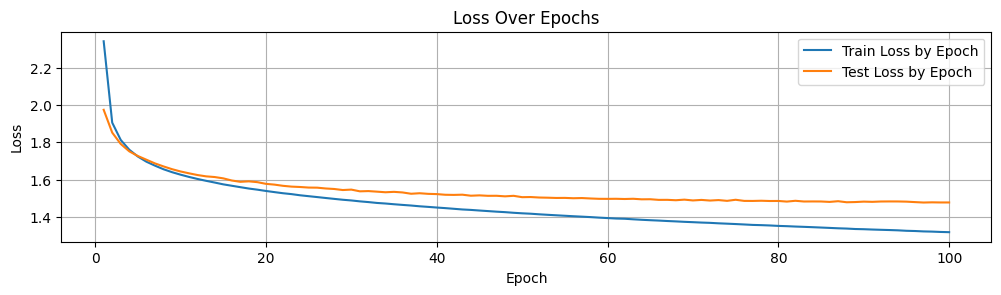

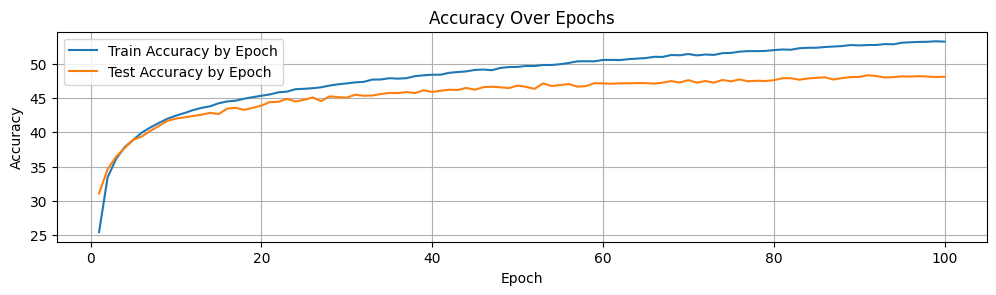

Accuracy: 48.09%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,58.1,54.8,35.2,30.2,41.6,42.0,51.2,51.4,58.8,57.6


In [31]:
data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

nl=[40,80,100,10] #Καθορισμός των νευρώνων features εισόδου κάθε layer καθώς και nl[-1]=10 η έξοδοι του νευρωνικού.
epochs= 100
my_nn=my_NN_tensor(nl,0.001,0.85).to(device)
num_batches=1000 #50.000/1000=50 εικόνες/batch
my_tt_plot(my_nn,num_batches,epochs,data_train,data_test,label_train,label_test)


Χρόνος εκπαίδευσης : Περίπου 3 λεπτά.

Τα αποτελέσματα είναι παρόμοια με πρίν παρόλου που διπλασιάσαμε το πληθός των νευρώνων στο δεύτερο κρυφό επίπεδο. Ωστόσο, αυτή η μειώση στα τελικά accuracies ενδεχομένως δείχνει ότι το νευρωνικό λόγω αυξημένης πολυπλοκότητας (διπλάσιοι νευρώνες) στο hidden layer άργησε να εκπαιδευτεί /γενικευτεί στον βαθμό που έχει κάνει το πιο απλό μοντέλο. Αυτό βεβαία αποτελεί μονάχα μια υπόθεση.

## Εκπαίδευση με όλα τα features των εικονών του Dataset (3072)

Μετά απο δοκιμές που κάναμε παρατηρήσαμε ότι συμφέρει να γίνει η κανονικοποίηση του dataset βάση των στατιστικών του training συνόλου στην είσοδο του νευρωνικού με χρήση του εργαλείου scaler. Εφόσον ήδη το κάναμε αυτό μια φορά προηγουμένως ,χρησιμοποιούμε τα ήδη scaled  (data_train_scaled_tensor,data_test_scaled_tensor) για την εκπαίδευση του νευρωνικού. Εξαιτίας περιορισμών στην μνήμη της GPU αλλάζουμε την αρχιτεκτονική του νευρωνικού ώστε να περιέχει λιγότερους νευρώνες στα hidden layer.

C:\Users\george theologis\AppData\Local\Temp\ipykernel_4700\861328152.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testlist=label_train[shuffled_list[k]]-torch.tensor(l_pred)
C:\Users\george theologis\AppData\Local\Temp\ipykernel_4700\861328152.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testlist=label_test-torch.tensor(l_pred)


Epoch: 0 | Train Loss: 1.94023, Train Accuracy: 29.41% |Test Loss: 1.80543, Test Accuracy: 35.74% 
Epoch: 10 | Train Loss: 1.59007, Train Accuracy: 43.76% |Test Loss: 1.64024, Test Accuracy: 41.47% 
Epoch: 20 | Train Loss: 1.52755, Train Accuracy: 46.08% |Test Loss: 1.61189, Test Accuracy: 42.40% 
Epoch: 30 | Train Loss: 1.49256, Train Accuracy: 46.96% |Test Loss: 1.61347, Test Accuracy: 42.46% 
Epoch: 40 | Train Loss: 1.46672, Train Accuracy: 48.10% |Test Loss: 1.60198, Test Accuracy: 43.21% 
Epoch: 50 | Train Loss: 1.44746, Train Accuracy: 48.38% |Test Loss: 1.60118, Test Accuracy: 43.12% 
Epoch: 60 | Train Loss: 1.43028, Train Accuracy: 48.91% |Test Loss: 1.61137, Test Accuracy: 43.08% 
Epoch: 70 | Train Loss: 1.41600, Train Accuracy: 49.65% |Test Loss: 1.60029, Test Accuracy: 43.41% 
Epoch: 80 | Train Loss: 1.40345, Train Accuracy: 49.78% |Test Loss: 1.61032, Test Accuracy: 43.49% 
Epoch: 90 | Train Loss: 1.39480, Train Accuracy: 50.09% |Test Loss: 1.60818, Test Accuracy: 43.46% 


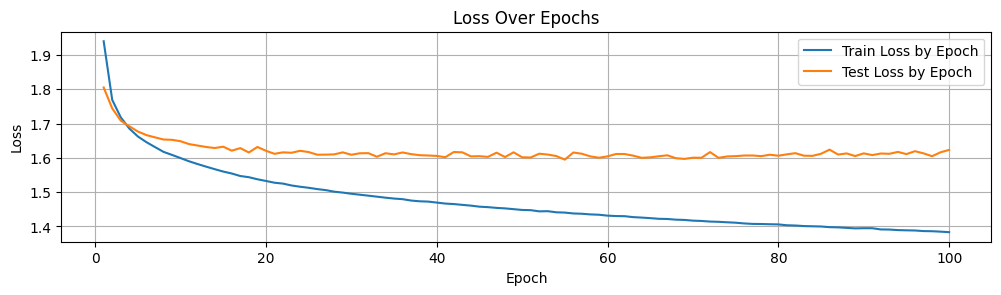

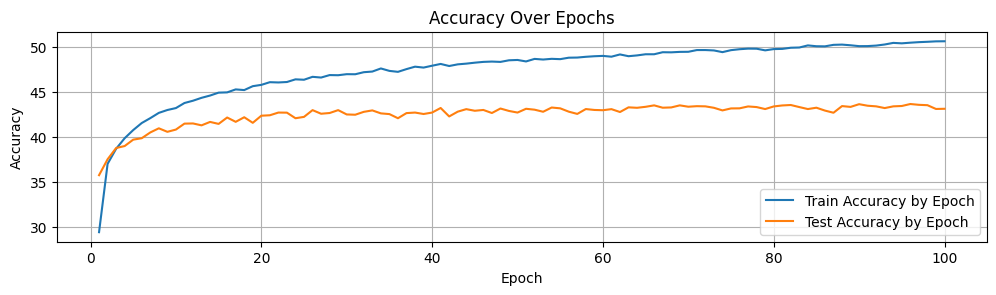

Accuracy: 43.14%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,44.7,58.0,26.3,22.7,38.2,31.3,54.0,46.9,63.4,45.9


In [38]:
#data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_scaled_tensor.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_scaled_tensor.to(device), label_test_cifar10.to(device).long()

nl=[3072,10,40,10] #Καθορισμός των νευρώνων features εισόδου κάθε layer καθώς και nl[-1]=10 η έξοδοι του νευρωνικού.
epochs= 100
my_nn=my_NN_tensor(nl,0.003,0.8).to(device)
num_batches=1000 #50.000/1000=50 εικόνες/batch
my_tt_plot(my_nn,num_batches,epochs,data_train,data_test,label_train,label_test)

Χρόνος Εκπαίδευσης:8 λεπτά.

Με την δεδομένη αρχιτεκτονική και χρησιμοποιώντας το scaled dataset με όλα τα γνωρίσματα μιας εικόνας cifar-10 (3072 το μέγεθος της εισόδου) καταφέρουμε να πετύχουμε ποσοστό 43%> το οποίο είναι σαφώς καλύτερο από τα ποσοστά που δίνουν για το dataset οι classifiers της ενδιάμεσης εργασίας. Δυστυχώς, λόγω περιορισμών στη GPU δεν μπορέσαμε να βάλουμε παραπάνω νευρώνες στα hidden layers καθώς αυτό δημιουργούσε πίνακες στην gpu οι οποίοι δεν χωρούσαν στην μνήμη της (πρέπει να σκεφτούμε ότι για το batch training κατα τηαν οπισθοδιάδοση θα έχω tensor διαστάσης batch_size x 3072 x out_features_hidden_layer_1). Για αυτό στη συνέχεια θα ασχοληθούμε με το έτοιμο module της PyTorch που μεταξύ καλύτερης και γρηγορότερης λειτουργίας προσφέρει πληθώρα εργαλείων για να πειραματιστούμε.

## Υλοποίηση MLP Νευρωνικού Δικτύου με χρήση του nn Module της Pytorch

Θα εκμεταλλευτούμε τις δυνατότητες που προσφέρει η βιβλιοθήκη της PyTorch με την χρήση της έτοιμης κλάσης και των βελτιστοποιημένων μεθόδων για να εκπαιδεύσουμε πιο αποτελεσματικά και με περισσότερους τρόπους νευρωνικό δίκτυο-μοντέλο που θα επιλύει το πρόβλημα κατηγοριοποίησης της CIFAR-10. 

Σκοπός της παρούσας ενότητας είναι να εκτελέσουμε παραπάνω δοκιμές και να χρησιμοποίησουμε μεθοδολογίες που θα βοηθήσουν το νευρωνικό να καταλήξει σε καλύτερη γενίκευση και ορθότερες αποφάσεις.

Ορίζουμε τις απαραίτητες συνάρτησεις που εκτελούν τα στάδια εκπαίδευσης και ελέγχου/επικυροποίησης (Training_Process, Testing_Process). Επίσης , παρουσιάζουμε την training_test που εκτελεί το στάδιο εκπαίδευσης και παράλληλα χρησιμοποιεί τα δεδομένα ελέγχου σε κάθε εποχή ώστε να προσφέρει μια μέτρικη για την βελτίωση της γενίκευσης του νευρωνικού κατά την διάρκεια της εκπαίδευσης. Σε κάθε εποχή εκπαιδεύουμε το νευρωνικό δίκτυο σε όλα τα batches που αποτελούν συλλογικά το σύνολο εκπαίδευσης.

Τέλος με την συνάρτηση train_test_plot καλούμε την training_test και στη συνέχεια παιρνούμε διαγράμματα της καμπύλης μάθησης κατά την εκπαίδευση. Συγκεκριμένα, έχουμε ένα plot των μέσων losses των batches του συνόλου εκπαίδευσης ανά εποχή μαζί με έναν παράλληλο υπολογισμό του loss από το συνόλο ελέγχου (ως μια μορφή validation κατά το training) καθώς και της ακρίβειας (accuracy) ως ποσοστό επιτυχούς classification των δειγμάτων των συνόλων. 

In [16]:
def Training_process(model,data_train,label_train,optimizer,loss_fn):
       #Ετοιμάζω το model του νευρωνικού για το στάδιο εκπαίδευσης
       model.train()

       #Forward Διάδοση των δεδομένων Εκπαίδευσης απο το Layer εισόδου στο Layer Εξόδου 
       label_logits = model(data_train)  #Η έξοδος του στρώματος (layer) εξόδου είναι σε μορφή logits-> W*x+b δηλαδή δεν περνάει απο συνάρτηση ενεργοποιήσης 
       label_pred=torch.argmax(label_logits,dim=1) #Βάση του πιο μέγαλου logit απο τις εξόδους των νευρώνων του layer εξόδου, επιλέγω το μέγιστο (μεγαλύτερη τιμή ->μεγαλύτερη πιθανότητα για την κλάσση που αντιπροσωπεύει ο νευρώνας εξόδου).

        #Υπολογίζω τις απώλειες κάθε δείγματος στο batch και παίρνω τον μέσο όρο loss 
       loss = loss_fn(label_logits,label_train) #βάζω κατευθείαν τα label_logits στην CrossEntropyLoss καθώς υπολογίζει το softmax εσωτερικά.
       acc = accuracy(label_pred,label_train) 

        #Αρχικοποιούμε τα grads στο μηδέν ώστε να μην μεταφερθεί πληροφορία στην διαδικασία βελτιστοποίησης απο τις παραγώγους της προηγούμενης οπισθοδιάδοσης.
       optimizer.zero_grad()

        # Οπισθοδιάδοση (Back Propagation)
       loss.backward()

        #Ενημέρωση Συναπτικών Βαρών και μοντέλου
       optimizer.step()

       return loss,acc

def Testing_process(model,data_test,label_test,loss_fn):
       #Το μοντέλο ετοιμάζεται για έλεγχο. Θα αγνοήσει dropouts, και άλλες διαδικασίες που εφαρμόστηκαν κατά την εκπαίδευση του νερυωνικού αλλά η εφαρμογή στον έλεγχο θα οδηγούσε σε αλλιώση του μοντέλου.
       model.eval()
       with torch.inference_mode():
              # Πέρασμα (forward) των δεδομένων ελέγχου από το νευρωνικό
              test_logits = model(data_test) 
              #Η έξοδος με την μεγαλύτερη τιμή στο Layer εξόδου αντιστοιχεί στην πιο πιθανή κλάση στην οποία ανήκει συγκεκριμένο δεδομένο εισόδου. Επομένως κατηγοροποιούμε το δεδομένο ελέγχου σε αυτή την κλάση.
              test_pred=torch.argmax(test_logits,dim=1)
              #Υπολογίζω απώλεια και ακρίβεια κατηγοροποίησης με χρήση των πραγματικών ετικετών ελέγχου (label_test) των δεδομένων ελέγχου (data_test)
              test_loss = loss_fn(test_logits,label_test)
              test_acc = accuracy(test_pred,label_test)  
       return test_loss,test_acc          


In [15]:

def training_testing(model,epochs,learning_rate,mmnt,data_train,label_train,data_test,label_test,batch_num,cv):
    loss_fn = nn.CrossEntropyLoss()  #Η συνάρτηση απώλειας  επιλέγεται η CrossEntropyLoss
    optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate,momentum=mmnt)  #Ως αλγόριθμος βελτιστοποιήσης επιλέγεται η Stohastic Gradient Descent
    list_test_loss=[]
    list_train_loss=[]
    list_train_acc=[]
    list_test_acc=[]

    for epoch in range(epochs):

        mean_loss=0
        mean_acc=0
        shuffled_list=split_shuffle(len(data_train),batch_num) #Κάθε εποχή δημιουργούνται νέα batches από το συνολικό batch εκπαίδευσης (data_train)
        for k in range(len(shuffled_list)):
            ### Training
            loss,acc=Training_process(model,data_train[shuffled_list[k]],label_train[shuffled_list[k]],optimizer,loss_fn) #Σε κάθε batch κανώ forward στο δίκτυο και επείτα οπισθοδίαδοση για να ενημερωθούν τα βάρη
            mean_loss+=loss
            mean_acc+=acc
        mean_acc=mean_acc/len(shuffled_list)   #Επιλέγουμε να κρατηθεί ο μέσος όρος της επιτυχίας (accuracy) και απώλειας (loss) των επιτυχιών και απωλειών των (mini-) batches κατά την διαρκεία της εποχής.
        mean_loss=mean_loss/len(shuffled_list)  
        list_train_loss.append(mean_loss)
        list_train_acc.append(mean_acc)

         ### Testing
        if cv==False:    #cv=Cross-Validation. Κατά το Cross-Validation οτάν συμβαίνει η εκπαίδευση δεν χρειάζομαι τα print ανά εποχή αλλά και ούτε να πραγματοποίω καποία παράλληλη επικύρωση/έλεγχο

            test_loss,test_acc =Testing_process(model,data_test,label_test,loss_fn) #Διενεργώ Έλεγχο με τα δεδομένα Ελέγχου data_test

            list_test_loss.append(test_loss)
            list_test_acc.append(test_acc)
        
            # Τυπώνω ανά 10 εποχές την απώλεια και επιτυχία αξιολόγησης κατά την διάρκεια της εκπαίδευσης και του ελέγχου.
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Train Loss: {mean_loss:.5f}, Train Accuracy: {mean_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
    return list_train_loss,list_test_loss,list_train_acc,list_test_acc  #τα επιστρέφω για να τα κάνω plot.

In [17]:
def train_test_plot(model,epochs,lr,mom,data_train,label_train,data_test,label_test,nb,cv):
    ltr_loss,lts_loss,ltr_acc,lts_acc=training_testing(model,epochs,lr,mom,data_train,label_train,data_test,label_test,nb,cv) #train and validate-test

    epoch_axis = np.arange(1, epochs + 1)

    ltr_loss_cpu=[loss.cpu().item() for loss in ltr_loss]
    lts_loss_cpu = [loss.cpu().item() for loss in lts_loss]
    ltr_acc_cpu=[loss.cpu().item() for loss in ltr_acc]
    lts_acc_cpu = [loss.cpu().item() for loss in lts_acc]

    #Απώλειες Classification
    plt.figure(figsize=(12, 6))
    plt.subplot(2,1,1)
    plt.plot(epoch_axis,ltr_loss_cpu, label="Train Loss by Epoch")
    plt.plot(epoch_axis,lts_loss_cpu, label="Test Loss by Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()
    #Ακρίβεια Classification
    plt.figure(figsize=(12, 6))
    plt.subplot(2,1,2)
    plt.plot(epoch_axis,ltr_acc_cpu, label="Train Accuracy by Epoch")
    plt.plot(epoch_axis,lts_acc_cpu, label="Test Accuracy by Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()
    #Εφαρμογή το
    model.eval()
    with torch.inference_mode():
        # Πέρασμα (forward) των δεδομένων ελέγχου από το νευρωνικό
        test_logits = model(data_test) 
        #Η έξοδος με την μεγαλύτερη τιμή στο Layer εξόδου αντιστοιχεί στην πιο πιθανή κλάση στην οποία ανήκει συγκεκριμένο δεδομένο εισόδου. Επομένως κατηγοροποιούμε το δεδομένο ελέγχου σε αυτή την κλάση.
        test_pred=torch.argmax(test_logits,dim=1)    
    accuracy_and_class_torch(label_test,test_pred)

## Υλοποίηση Γενικού μοντέλου Νευρωνικού Δικτύου <b> Neural_Network_General_model</b> με χρήση nn.Module

Όπως και στην δικό μας νευρωνικό, έτσι και στη Pytorch το νευρωνικό δίκτυο-μοντέλο είναι αντικείμενο μιας κλάσης που κατασκευάζουμε εμείς. Η διαφορά έγκειται στο ότι η κλάση αυτή κληρονομεί τα γνωρίσματα-μεθόδους της κλάσης nn.Module. Έχοντας αυτή τη κλάση ως γονέα μπορούμε να αρχικοποίησουμε το μοντέλο ώστε να έχει τον αριθμό layers που θέλουμε (number_of_layers) με αριθμό γνωρισμάτων εισόδου (in_features) και γνωρισμάτων εξόδου (out_features) που καθορίζουμε με την στήλη nl. Παράλληλα, ορίζουμε κατάλληλα αμά θέλουμε να χρησιμοποίησουμε batch normalization (bn) ή dropout layer (drop) σε κάποιο επίπεδο (layer) αλλά και την συνάρτηση ενεργοποίησης των νευρώνων του επιπέδου. 

Με το κατάλληλο initialization μποροούμε να πάρουμε διάφορα μοντέλα-νευρωνικά δίκτυα τα όποια θα εκπαιδεύσουμε ώστε να μπορέσουν να λύσουν το πρόβλημα κατηγοριοποίησης της CIFAR-10.

In [18]:
class Neural_Network_General_model(nn.Module):
    def __init__(self,nl,number_of_layers,bn,drop,activation_fun):
    
        super().__init__()
        self.list_layers= nn.ModuleList()
        self.list_bn= nn.ModuleList()
        self.list_dropout= nn.ModuleList()
        self.number_of_layers=number_of_layers
        self.bn=bn
        self.drop=drop
        self.list_activation_fun=activation_fun
        for index in range(number_of_layers): #Σχηματισμός Layers
            self.list_layers.append(nn.Linear(in_features=nl[index], out_features=nl[index+1]) )
            if (bn[index]==True):#Batch Normalization
                self.list_bn.append(nn.BatchNorm1d(nl[index]))
            else:
                self.list_bn.append(None)
            if (drop[index]>0):#Dropout layer
                self.list_dropout.append(nn.Dropout(p=drop[index]))
            else:
                self.list_dropout.append(None)
        
        self.sigmoid = nn.Sigmoid()
        self.tanh=nn.Tanh()
        self.relu=nn.ReLU()
    
    # Υπολογισμός Forward Pass
    def forward(self, x):
        for index in range(self.number_of_layers-1):
            if(self.bn[index]==True):
                x=self.list_bn[index](x) #πρώτα batch normalization 
            x=self.list_activation_fun[index](self.list_layers[index](x)) # μετά linear και activation function
            if (self.drop[index]>0):
                x=self.list_dropout[index](x) #έπειτα dropout
        #επίπεδο-στρώμα εξόδου:
        if(self.bn[-1]==True):
            x=self.list_bn[-1](x)
        x=self.list_layers[-1](x) #στο τέλος παίρνω μόνο το linear->logit του επίπεδου εξόδου. Softmax θα εφαρμόσει σε αυτό εσωτερικά η lossfn. 
        return x


### Χρησιμότητα Μεθόδων Κανονικοποίησης

Χρησιμοποίηθηκαν οι εξής μέθοδοι κανονικοποιήσης στο εσωτερικό του νευρωνικού.

* dropout layers: Μετά τις συναρτήσεις ενεργοποίησης στην διαδικασία εκπαίδευσης εισάγει μια πιθανότητα βάση p βάση της οποίας η εξόδος ποσοστού νευρώνων μηδενίζεται ενώ οι εξόδοι των υπόλοιπων νευρώνων του επίπεδου κλιμακώνονται με τον όρο 1/(1-p). Με αυτό τον τρόπο εμποδίζουμε καποίους νευρώνες να κυριαρχίσουν στο δίκτυο και να εμποδίσουν την δυνατότητα του να γενικευτεί.  

* batch_normalization: Κανεί scaling στα training batches αλλά και στις εισόδους των layers κατά την εκπαίδευση ώστε τα κοινά γνωρίσματα κάθε batch να έχουν μέση τιμή ίση με το μηδέν και τυπική απόκλιση ίση με την μονάδα. 

Αυτά εφαρμόζονται μόνο κατά την διαδικασία εκπαίδευσης και όχι κατα το validation (με το test batch της cifar-10). Επομένως, αυτό όπως θα δούμε επηρρεάζει τα losses των training batches και πιθανώς κάνουν τα losses τους να είναι πιο αυξημένα από ότι αυτά του validation set ανά περιστάσεις. Ωστόσο είναι καλές μέθοδοι για να εμποδίσουν τον απειρισμό της ενεργοποίησης της ReLU μεταξύ των layers και εμποδίζουν να συμβεί overfitting.

Επίσης όπως και στο δικό μας νευρωνικό δίκτυο και εδώ χρηισμοποιούμε συναρτήσεις ενεργοποίησης ReLU καθώς αποφεύγω τον κορεσμό της sigmoid και της tanh σε μεγάλες θετικές τιμές εισόδου στη συνάρτηση ενεργοποίησης. Επομένως για τέτοιες εισόδους , η παράγωγος της ReLU είναι ίση με 1 αντί να μηδενίζεται και έτσι γλυτώνουμε απο το φαινόμενο Vanishing Gradients που εμφανίζεται στη sigmoid και στη tanh που έχει αρνητική επίδραση στην οπισθοδιάδοση και στην εκπαίδευση του neural network.

## <center> Εφαρμογές διάφορων μοντέλων </center>

### <b>3 Layers</b> [2 Hidden:(3072->100, 100->80), 1 εξόδου (80->10)] με <b>learning rate</b>=0.0001, <b>moment_parameter</b>=0.8 χωρίς batch normalization και layer dropout και με batch_size=50.000/100=500 εικόνες /batch

Εδω θα δοκιμάσουμε ως είσοδο όλα τα features της εικόνας (3072). Οι πιθανές διαφορές με το δικό μας νευρωνικό είναι πιθανό να οφείλονται σε δικά μας λάθη στον κώδικα ή και σε διαφορά στην αρχικοποίηση των βαρών.

Epoch: 0 | Train Loss: 2.80918, Train Accuracy: 20.99% | Test Loss: 2.03134, Test Accuracy: 27.34%
Epoch: 10 | Train Loss: 1.75843, Train Accuracy: 37.46% | Test Loss: 1.75875, Test Accuracy: 37.64%
Epoch: 20 | Train Loss: 1.66983, Train Accuracy: 41.06% | Test Loss: 1.69890, Test Accuracy: 39.85%
Epoch: 30 | Train Loss: 1.61424, Train Accuracy: 42.99% | Test Loss: 1.65271, Test Accuracy: 41.11%
Epoch: 40 | Train Loss: 1.57577, Train Accuracy: 44.41% | Test Loss: 1.63620, Test Accuracy: 41.96%
Epoch: 50 | Train Loss: 1.54555, Train Accuracy: 45.55% | Test Loss: 1.60648, Test Accuracy: 42.74%
Epoch: 60 | Train Loss: 1.51965, Train Accuracy: 46.24% | Test Loss: 1.60612, Test Accuracy: 43.01%
Epoch: 70 | Train Loss: 1.49898, Train Accuracy: 47.04% | Test Loss: 1.59732, Test Accuracy: 43.37%
Epoch: 80 | Train Loss: 1.47335, Train Accuracy: 47.95% | Test Loss: 1.59322, Test Accuracy: 43.87%
Epoch: 90 | Train Loss: 1.45581, Train Accuracy: 48.53% | Test Loss: 1.58861, Test Accuracy: 43.40%
E

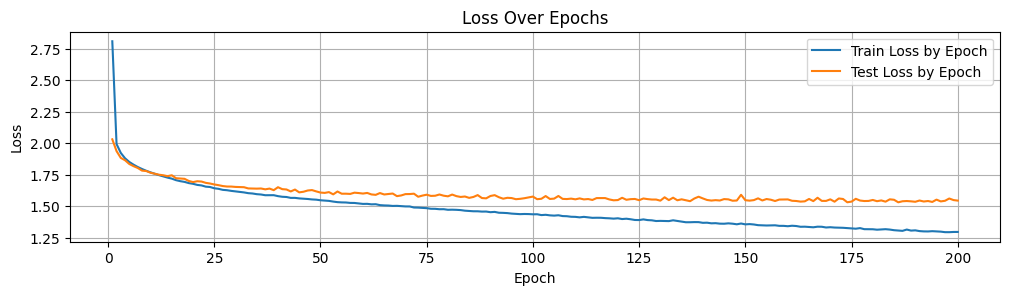

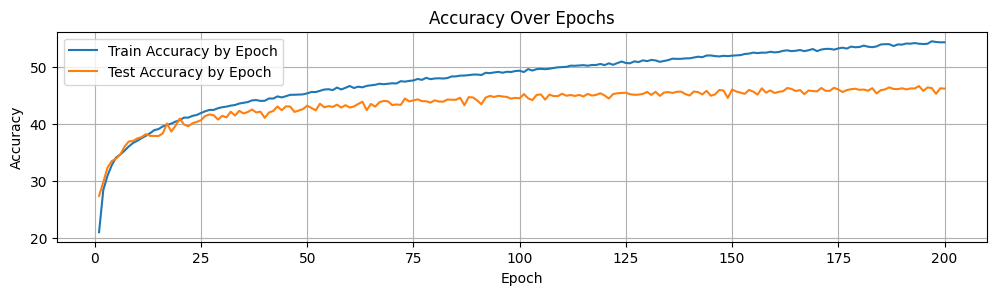

Accuracy: 46.14%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,62.4,64.7,29.0,26.4,40.7,32.0,45.5,52.2,61.5,47.0


In [ ]:
nl3=[3072,100,80,10] #In-out features

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[False,False,False],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,200,0.0001,0.8,data_train,label_train,data_test,label_test,100,False)

Βλέπουμε ότι τα συμπεράσματα για την επιτυχία άνα κλάση που βγάλαμε και με το δικό μας νευρωνικό για τα δεδομένα μειωμένης διάστασης επιβεβαιώνονται και εδώ καθώς παίρνουμε ένα ποσοστό κοντά στο 50%. Η επιλογή του συγκεκριμένου momentum και learning rate μας δίνει καλή απόκριση ως προς το validation

### <b>3 Layers</b> [2 Hidden:(3072->100, 100->80), 1 εξόδου (80->10)] με <b>learning rate</b>=0.0001, <b>moment_parameter</b>=0 χωρίς batch normalization και layer dropout και με batch_size=50.000/1000=50 εικόνες /batch

Βλέπουμε πως επηρρεάζεται η καμπύλη μάθησης σε σχέση με πρίν αφού μικρύναμε το σύνολο εικόνων ανα batch (άρα αυξήσαμε τα batches).

Epoch: 0 | Train Loss: 2.21029, Train Accuracy: 24.40% | Test Loss: 2.00608, Test Accuracy: 28.30%
Epoch: 10 | Train Loss: 1.66127, Train Accuracy: 40.92% | Test Loss: 1.67289, Test Accuracy: 40.78%
Epoch: 20 | Train Loss: 1.54884, Train Accuracy: 44.90% | Test Loss: 1.62691, Test Accuracy: 42.40%
Epoch: 30 | Train Loss: 1.47845, Train Accuracy: 47.64% | Test Loss: 1.61218, Test Accuracy: 43.53%
Epoch: 40 | Train Loss: 1.42533, Train Accuracy: 49.57% | Test Loss: 1.54183, Test Accuracy: 46.29%
Epoch: 50 | Train Loss: 1.38731, Train Accuracy: 50.57% | Test Loss: 1.55397, Test Accuracy: 45.51%
Epoch: 60 | Train Loss: 1.35121, Train Accuracy: 51.95% | Test Loss: 1.52880, Test Accuracy: 46.60%
Epoch: 70 | Train Loss: 1.32314, Train Accuracy: 52.94% | Test Loss: 1.53603, Test Accuracy: 46.34%
Epoch: 80 | Train Loss: 1.29527, Train Accuracy: 54.15% | Test Loss: 1.51684, Test Accuracy: 47.10%
Epoch: 90 | Train Loss: 1.27259, Train Accuracy: 54.76% | Test Loss: 1.51517, Test Accuracy: 47.19%
E

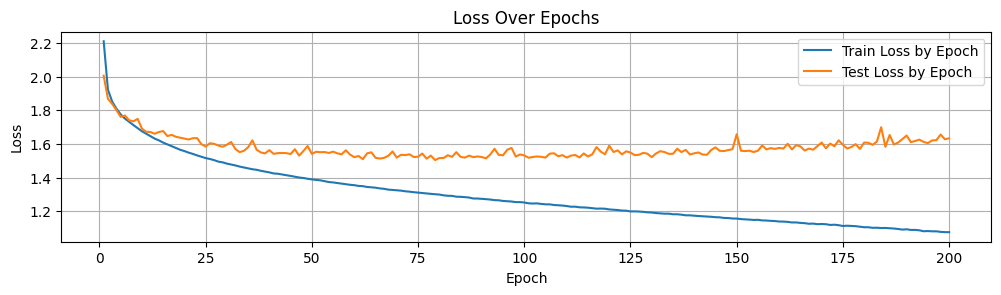

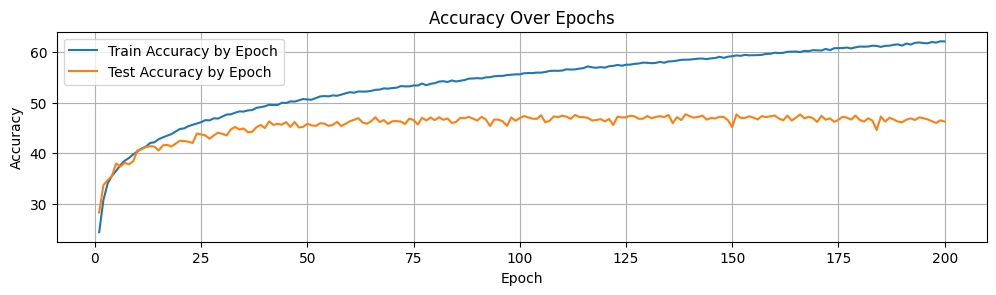

Accuracy: 46.25%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,60.0,60.3,39.0,24.4,35.4,32.9,62.0,40.5,61.1,46.9


In [101]:
nl3=[3072,100,80,10]
 
#data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[False,False,False],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,200,0.0001,0,data_train,label_train,data_test,label_test,1000,False)

Παρατηρούμε ότι τα αποτελέσματα (losses,accuracy) είναι πανομοιότυπα με πριν παρόλο που το μέγεθος δεδομένων ανα batch έγινε μικρότερο (απο 500 εικόνες/batch->50 εικόνες/batch).
Ωστόσο, μπορούμε να δούμε ότι των μέσων losses για τα training data πέφτει πιο απότομα στο τέλος της εποχής 200 στο μικρότερο batch size. Αυτό μπορεί να ερμηνευτεί από το γεγονός ότι μεγαλύτερο batch size οδηγεί σε καλύτερη εκτιμήση του διανύσματος κλίσης του SGD άρα και σε πιο ομαλές μεταβολές προς το ελάχιστο του προβλήματος ελαχιστοποίησης ενώ η προσέγγιση της κλίσης από το μικρότερο batch size έχει πιο πολύ θόρυβο. Άρα εδώ ενδέχεται να είχε την τάση να το οδηγήσει το train προς μικρότερο loss πιο γρήγορα χωρίς αυτό όμως να εγγυάται την καλύτερη γενίκευση.


Epoch: 0 | Train Loss: 2.32514, Train Accuracy: 19.40% | Test Loss: 2.07412, Test Accuracy: 24.81%
Epoch: 10 | Train Loss: 1.73462, Train Accuracy: 37.25% | Test Loss: 1.74697, Test Accuracy: 36.38%
Epoch: 20 | Train Loss: 1.64521, Train Accuracy: 40.94% | Test Loss: 1.69721, Test Accuracy: 39.38%
Epoch: 30 | Train Loss: 1.57872, Train Accuracy: 43.52% | Test Loss: 1.64451, Test Accuracy: 41.16%
Epoch: 40 | Train Loss: 1.52779, Train Accuracy: 45.51% | Test Loss: 1.63678, Test Accuracy: 41.98%
Epoch: 50 | Train Loss: 1.48656, Train Accuracy: 47.02% | Test Loss: 1.60586, Test Accuracy: 42.94%
Epoch: 60 | Train Loss: 1.45245, Train Accuracy: 48.35% | Test Loss: 1.59505, Test Accuracy: 44.05%
Epoch: 70 | Train Loss: 1.42040, Train Accuracy: 49.54% | Test Loss: 1.57353, Test Accuracy: 44.73%
Epoch: 80 | Train Loss: 1.39288, Train Accuracy: 50.58% | Test Loss: 1.55707, Test Accuracy: 45.45%
Epoch: 90 | Train Loss: 1.36609, Train Accuracy: 51.46% | Test Loss: 1.56296, Test Accuracy: 46.05%
E

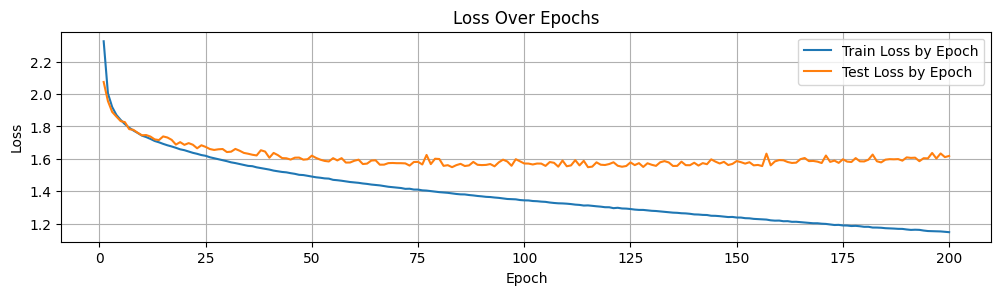

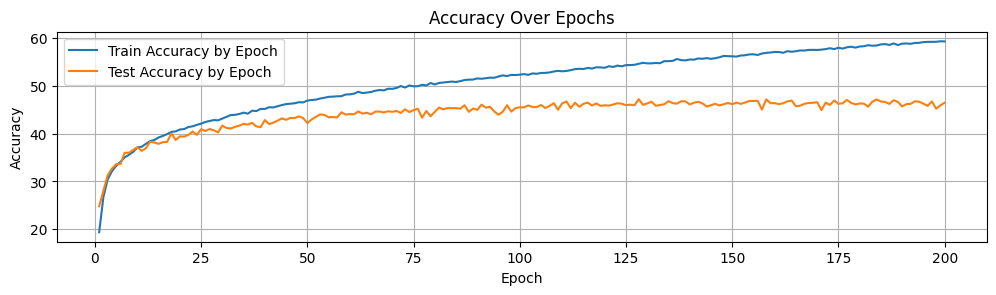

Accuracy: 46.46%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,58.2,61.7,24.1,31.4,43.1,27.8,44.3,55.1,68.3,50.6


In [34]:
nl3=[3072,100,80,10]
 
#data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[False,False,False],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,200,0.0001,0,data_train,label_train,data_test,label_test,1000,False)

Αμα αφαιρέσουμε το momentum (παραμετρός ορμής=0) και παράλληλα μεγαλώσουμε και το learning rate κατα 10 ,βλέπουμε ότι το νευρωνικό με την δεδομένη αρχιτεκτονική οδηγεί σε προβληματική καμπύλη μάθησης.

Epoch: 0 | Train Loss: 3.49109, Train Accuracy: 9.99% | Test Loss: 2.30841, Test Accuracy: 10.00%
Epoch: 10 | Train Loss: 2.30262, Train Accuracy: 9.99% | Test Loss: 2.30390, Test Accuracy: 10.00%
Epoch: 20 | Train Loss: 2.30242, Train Accuracy: 9.96% | Test Loss: 2.30382, Test Accuracy: 10.00%
Epoch: 30 | Train Loss: 2.30230, Train Accuracy: 9.95% | Test Loss: 2.30429, Test Accuracy: 9.99%
Epoch: 40 | Train Loss: 2.30151, Train Accuracy: 9.82% | Test Loss: 2.30371, Test Accuracy: 9.99%
Epoch: 50 | Train Loss: 2.30079, Train Accuracy: 9.79% | Test Loss: 2.30403, Test Accuracy: 9.99%
Epoch: 60 | Train Loss: 2.29998, Train Accuracy: 9.82% | Test Loss: 2.30375, Test Accuracy: 10.03%
Epoch: 70 | Train Loss: 2.29865, Train Accuracy: 10.16% | Test Loss: 2.30465, Test Accuracy: 10.18%
Epoch: 80 | Train Loss: 2.29633, Train Accuracy: 10.28% | Test Loss: 2.30193, Test Accuracy: 10.40%
Epoch: 90 | Train Loss: 2.14418, Train Accuracy: 18.32% | Test Loss: 2.13347, Test Accuracy: 18.55%
Epoch: 100 

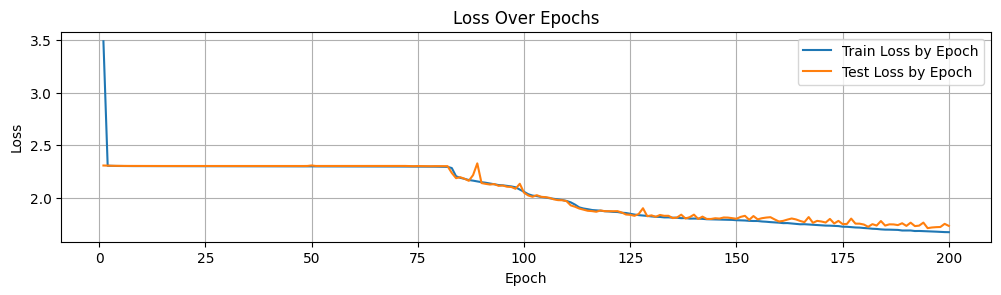

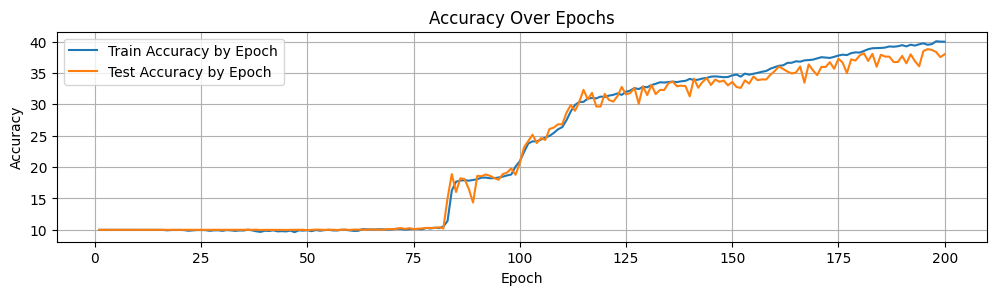

Accuracy: 37.99%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,49.0,44.3,18.1,3.0,46.2,25.8,42.8,53.5,49.3,47.9


In [35]:
nl3=[3072,100,80,10]
 
#data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[False,False,False],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,200,0.001,0,data_train,label_train,data_test,label_test,1000,False)

Το αποτέλεσμα του μηδενισμού της παραμέτρου της ορμής μαζί με την αύξηση του ρυθμού μάθησης κατά 10 είχε ως αποτέλεσμα το νευρωνικό να συγκλίνει γρήγορα για την δεδομένη αρχιτεκτονική σε τοπικά ελάχιστα και να αργεί να ξεκολλήσει από αυτά. Μπορούμε να φανταστούμε ότι 

Epoch: 0 | Train Loss: 1.88672, Train Accuracy: 34.37% | Test Loss: 1.72907, Test Accuracy: 40.68%
Epoch: 10 | Train Loss: 1.33845, Train Accuracy: 53.30% | Test Loss: 1.40927, Test Accuracy: 50.23%
Epoch: 20 | Train Loss: 1.18309, Train Accuracy: 58.61% | Test Loss: 1.37723, Test Accuracy: 50.76%
Epoch: 30 | Train Loss: 1.07201, Train Accuracy: 62.45% | Test Loss: 1.40467, Test Accuracy: 50.70%
Epoch: 40 | Train Loss: 0.98575, Train Accuracy: 65.57% | Test Loss: 1.41660, Test Accuracy: 50.80%
Epoch: 50 | Train Loss: 0.91956, Train Accuracy: 67.93% | Test Loss: 1.45079, Test Accuracy: 50.22%
Epoch: 60 | Train Loss: 0.85960, Train Accuracy: 70.04% | Test Loss: 1.49480, Test Accuracy: 50.22%
Epoch: 70 | Train Loss: 0.80605, Train Accuracy: 71.74% | Test Loss: 1.53882, Test Accuracy: 50.06%
Epoch: 80 | Train Loss: 0.76435, Train Accuracy: 73.33% | Test Loss: 1.55429, Test Accuracy: 49.43%
Epoch: 90 | Train Loss: 0.71778, Train Accuracy: 75.07% | Test Loss: 1.60439, Test Accuracy: 48.99%
E

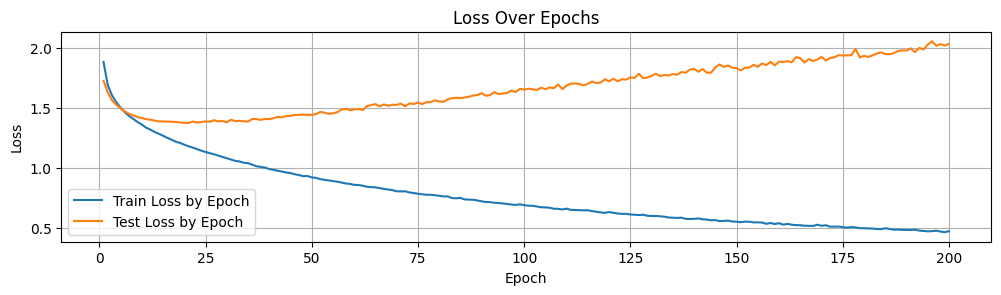

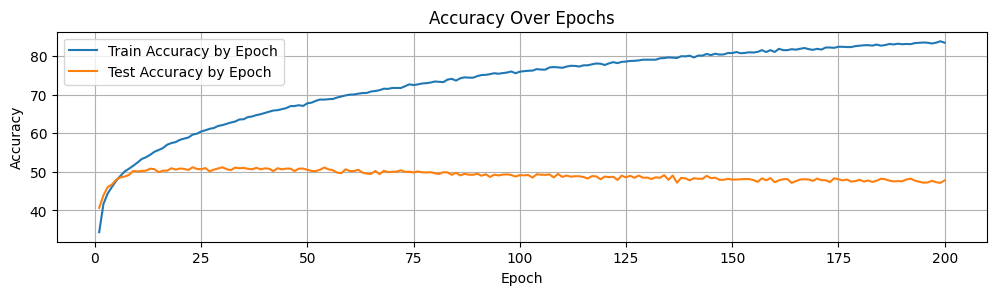

Accuracy: 47.78%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,53.7,54.6,41.9,29.1,37.2,40.4,54.4,50.2,65.0,51.3


In [ ]:
nl3=[3072,100,80,10]
 
#data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[True,True,True],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,200,0.001,0,data_train,label_train,data_test,label_test,1000,False)

Epoch: 0 | Train Loss: 1.88919, Train Accuracy: 34.45% | Test Loss: 1.73027, Test Accuracy: 40.50%
Epoch: 10 | Train Loss: 1.27830, Train Accuracy: 55.88% | Test Loss: 1.40763, Test Accuracy: 50.37%
Epoch: 20 | Train Loss: 1.10877, Train Accuracy: 61.41% | Test Loss: 1.39978, Test Accuracy: 50.79%
Epoch: 30 | Train Loss: 0.99253, Train Accuracy: 65.55% | Test Loss: 1.39967, Test Accuracy: 51.18%
Epoch: 40 | Train Loss: 0.90323, Train Accuracy: 68.66% | Test Loss: 1.49442, Test Accuracy: 49.27%
Epoch: 50 | Train Loss: 0.82609, Train Accuracy: 71.63% | Test Loss: 1.48914, Test Accuracy: 50.80%
Epoch: 60 | Train Loss: 0.74402, Train Accuracy: 74.68% | Test Loss: 1.65199, Test Accuracy: 49.23%
Epoch: 70 | Train Loss: 0.68849, Train Accuracy: 76.92% | Test Loss: 1.66184, Test Accuracy: 49.26%
Epoch: 80 | Train Loss: 0.62125, Train Accuracy: 79.39% | Test Loss: 1.81546, Test Accuracy: 47.53%
Epoch: 90 | Train Loss: 0.57845, Train Accuracy: 80.82% | Test Loss: 1.74320, Test Accuracy: 49.56%
E

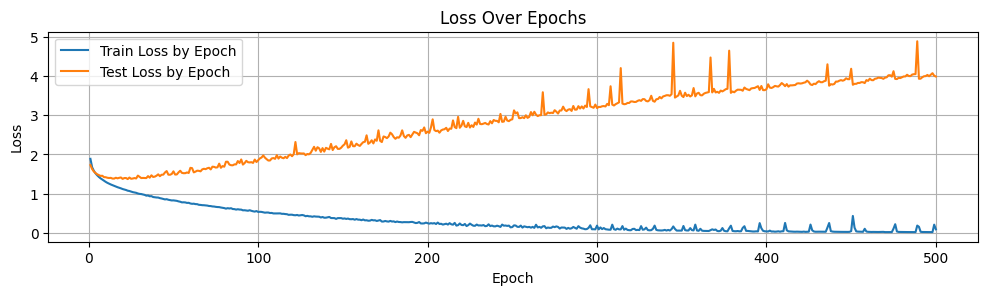

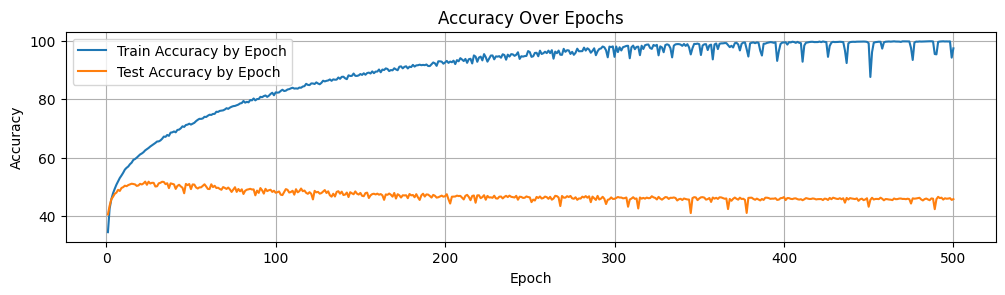

Accuracy: 45.78%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,57.3,53.8,36.5,29.1,38.4,37.8,46.6,52.5,59.5,46.3


In [112]:
nl3=[3072,100,80,10]
 
#data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[True,True,True],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,100,0.01,0,data_train,label_train,data_test,label_test,100,False)

Παρατηρούμε ότι εδώ το μοντέλο του νευρωνικού οδηγήθηκε σε Overfitting στα δεδομένα εκπαίδευσης.

Epoch: 0 | Train Loss: 2.11952, Train Accuracy: 23.09% | Test Loss: 1.88221, Test Accuracy: 35.31%
Epoch: 10 | Train Loss: 1.60062, Train Accuracy: 43.51% | Test Loss: 1.52369, Test Accuracy: 46.82%
Epoch: 20 | Train Loss: 1.49121, Train Accuracy: 47.25% | Test Loss: 1.44893, Test Accuracy: 48.58%
Epoch: 30 | Train Loss: 1.42270, Train Accuracy: 49.62% | Test Loss: 1.41547, Test Accuracy: 49.71%
Epoch: 40 | Train Loss: 1.37303, Train Accuracy: 51.11% | Test Loss: 1.40062, Test Accuracy: 50.33%
Epoch: 50 | Train Loss: 1.32549, Train Accuracy: 53.39% | Test Loss: 1.39518, Test Accuracy: 50.28%
Epoch: 60 | Train Loss: 1.29218, Train Accuracy: 54.26% | Test Loss: 1.39601, Test Accuracy: 50.63%
Epoch: 70 | Train Loss: 1.25713, Train Accuracy: 55.38% | Test Loss: 1.38721, Test Accuracy: 50.82%
Epoch: 80 | Train Loss: 1.22506, Train Accuracy: 56.68% | Test Loss: 1.39077, Test Accuracy: 50.44%
Epoch: 90 | Train Loss: 1.19708, Train Accuracy: 57.50% | Test Loss: 1.40444, Test Accuracy: 50.37%
E

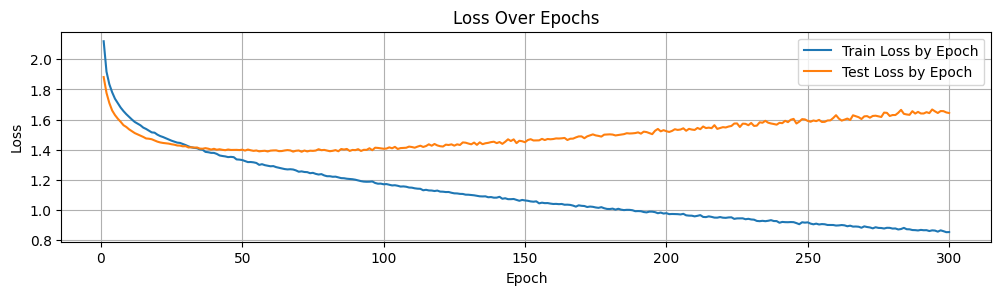

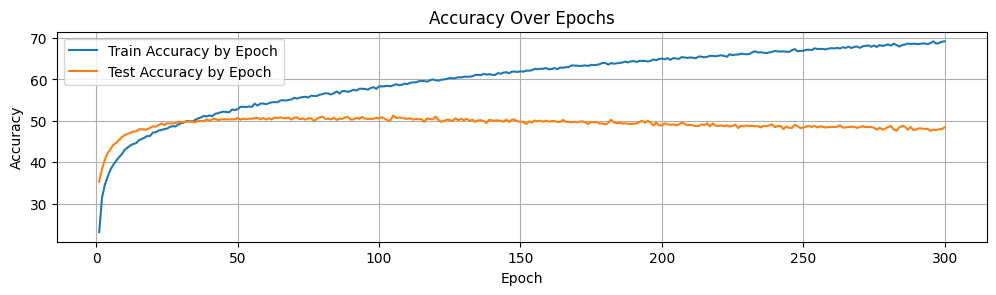

Accuracy: 48.44%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,56.6,54.6,37.3,34.6,45.3,39.4,54.6,50.4,61.5,50.1


In [47]:
nl3=[3072,60,400,10]
 
#data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[True,True,True],[0,0.5,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,300,0.0001,0.8,data_train,label_train,data_test,label_test,1000,False)

In [ ]:
#Ενδεικτίκα για PCA ανάλυση το
scaler = StandardScaler()
pca = PCA(n_components=50)  # Κρατώ 50 κύριες συνιστώσες

#Κάνουμε scale τα training data. Κρατάμε τον scaler που προκύπτει μόνο από το fit στα training data. Αντίστοιχα κάνουμε PCA μετασχηματισμό στα training data και αποθηκεύουμε τους πίνακες του μετασχηματισμού για να εφαρμοστούν έπειτα στα test data.
data_train_np=data_train_cifar10.numpy().astype(np.float32)  
data_train_scaled = scaler.fit_transform(data_train_np)  
data_train_pca_np = pca.fit_transform(data_train_scaled)

#scaling και pca μετασχηματισμός χρησιμοποιώντας τα μεγέθη και πίνακες που προέυκυψαν από τα training data
data_test_np=data_test_cifar10.numpy().astype(np.float32)
data_test_scaled = scaler.transform(data_test_np)
data_test_pca_np = pca.transform(data_test_scaled)

data_train_pca=torch.from_numpy(data_train_pca_np).to(torch.float32)
data_test_pca=torch.from_numpy(data_test_pca_np).to(torch.float32)

Με χρήση PCA batch normalization καθώς και με αλλαγή στην αρχιτεκτονική μπρούμε να πετύχουμε καλύτερα αποτελέσματα.

Epoch: 0 | Train Loss: 1.85068, Train Accuracy: 34.12% | Test Loss: 1.69667, Test Accuracy: 39.91%
Epoch: 10 | Train Loss: 1.40848, Train Accuracy: 49.97% | Test Loss: 1.42555, Test Accuracy: 48.94%
Epoch: 20 | Train Loss: 1.30334, Train Accuracy: 53.76% | Test Loss: 1.39103, Test Accuracy: 50.19%
Epoch: 30 | Train Loss: 1.23628, Train Accuracy: 56.26% | Test Loss: 1.38089, Test Accuracy: 51.24%
Epoch: 40 | Train Loss: 1.17816, Train Accuracy: 58.23% | Test Loss: 1.37998, Test Accuracy: 51.09%
Epoch: 50 | Train Loss: 1.13803, Train Accuracy: 59.76% | Test Loss: 1.38135, Test Accuracy: 51.48%
Epoch: 60 | Train Loss: 1.10050, Train Accuracy: 60.98% | Test Loss: 1.39632, Test Accuracy: 51.80%
Epoch: 70 | Train Loss: 1.07211, Train Accuracy: 62.13% | Test Loss: 1.41422, Test Accuracy: 51.28%
Epoch: 80 | Train Loss: 1.04572, Train Accuracy: 62.65% | Test Loss: 1.42033, Test Accuracy: 51.76%
Epoch: 90 | Train Loss: 1.01723, Train Accuracy: 63.86% | Test Loss: 1.44168, Test Accuracy: 51.35%


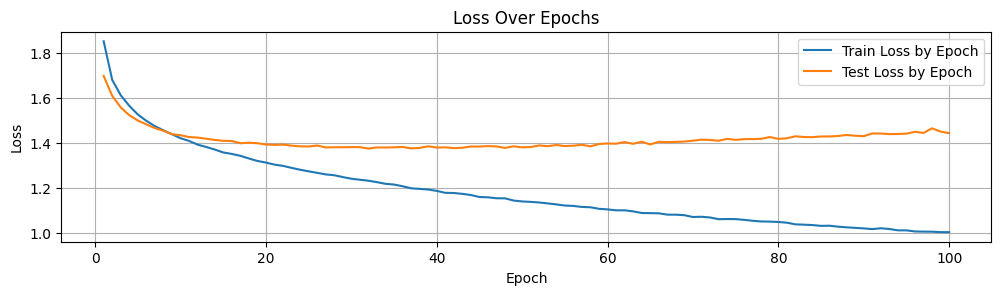

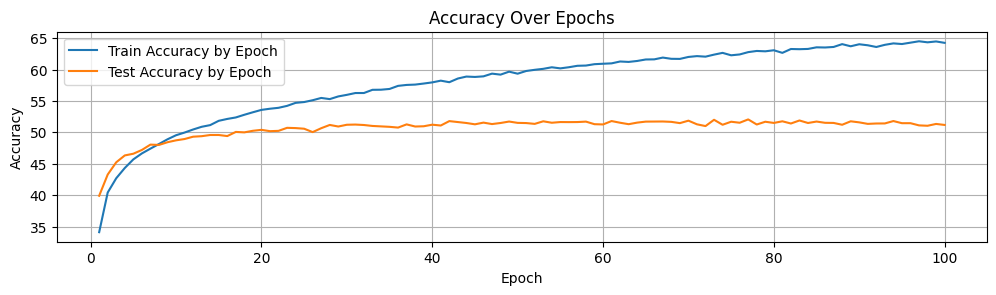

Accuracy: 51.18%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,64.3,60.5,33.2,31.2,45.1,41.9,59.6,55.4,65.1,55.5


In [ ]:
nl3=[50,80,400,10]
 
data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()

#data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
#data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

nn_3L = Neural_Network_General_model(nl3,3,[False,True,True],[0,0,0],[nn.ReLU(),nn.ReLU()]).to(device)
nn_3L
train_test_plot(nn_3L,100,0.001,0.8,data_train,label_train,data_test,label_test,1000,False)

Μια καλή ιδέα σε αυτό το σημείο είναι να αυξήσουμε την πολυπλοκότητα του μοντέλου προσθέτωντας ακόμα ένα hidden layer.

Epoch: 0 | Train Loss: 2.05218, Train Accuracy: 25.59% | Test Loss: 1.82815, Test Accuracy: 35.63%
Epoch: 10 | Train Loss: 1.58802, Train Accuracy: 43.83% | Test Loss: 1.50509, Test Accuracy: 47.15%
Epoch: 20 | Train Loss: 1.47206, Train Accuracy: 47.64% | Test Loss: 1.42184, Test Accuracy: 50.00%
Epoch: 30 | Train Loss: 1.40101, Train Accuracy: 50.00% | Test Loss: 1.38014, Test Accuracy: 50.93%
Epoch: 40 | Train Loss: 1.34574, Train Accuracy: 52.27% | Test Loss: 1.35040, Test Accuracy: 52.26%
Epoch: 50 | Train Loss: 1.30162, Train Accuracy: 53.70% | Test Loss: 1.33388, Test Accuracy: 52.49%
Epoch: 60 | Train Loss: 1.26044, Train Accuracy: 54.97% | Test Loss: 1.31909, Test Accuracy: 53.54%
Epoch: 70 | Train Loss: 1.22558, Train Accuracy: 56.36% | Test Loss: 1.31330, Test Accuracy: 53.64%
Epoch: 80 | Train Loss: 1.19190, Train Accuracy: 57.58% | Test Loss: 1.30542, Test Accuracy: 54.14%
Epoch: 90 | Train Loss: 1.16004, Train Accuracy: 58.32% | Test Loss: 1.30068, Test Accuracy: 54.49%


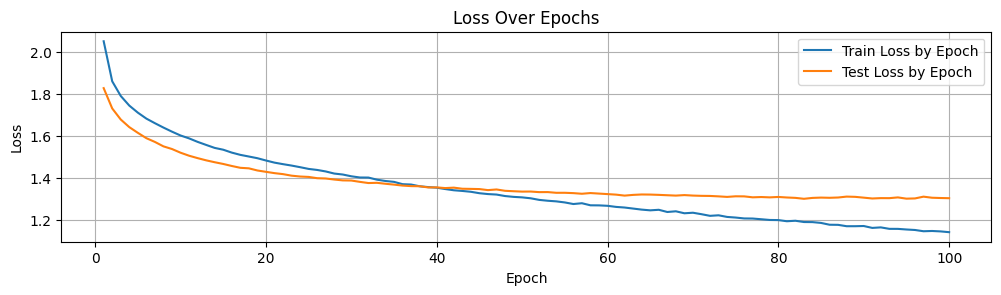

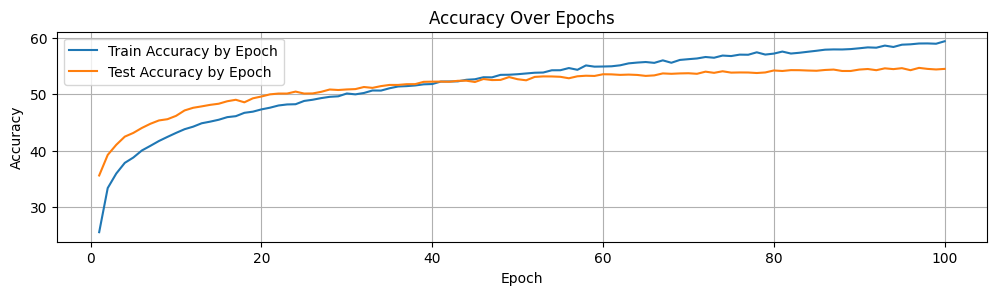

Accuracy: 54.51%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,60.3,63.4,38.2,33.9,45.6,43.4,66.7,60.8,71.9,60.9


In [71]:
nl4=[50,200,1000,100,10]
nn_4L = Neural_Network_General_model(nl4,4,[False,False,False,False],[0,0.75,0,0],[nn.ReLU(),nn.ReLU(),nn.ReLU()]).to(device)
nn_4L
train_test_plot(nn_4L,100,0.0005,0.9,data_train,label_train,data_test,label_test,1000,False)


In [124]:
nl4=[50,200,1000,200,10]
nn_4L = Neural_Network_General_model(nl4,4,[False,False,False,False],[0,0.6,0,0],[nn.ReLU(),nn.ReLU(),nn.ReLU()]).to(device)
train_test_plot(nn_4L,200,0.0005,0.9,data_train,label_train,data_test,label_test,1000,False)


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Epoch: 0 | Train Loss: 2.04046, Train Accuracy: 25.90% | Test Loss: 1.82337, Test Accuracy: 34.86%
Epoch: 10 | Train Loss: 1.58702, Train Accuracy: 43.37% | Test Loss: 1.51236, Test Accuracy: 46.69%
Epoch: 20 | Train Loss: 1.47656, Train Accuracy: 47.83% | Test Loss: 1.43250, Test Accuracy: 49.12%
Epoch: 30 | Train Loss: 1.40491, Train Accuracy: 49.98% | Test Loss: 1.38653, Test Accuracy: 50.78%
Epoch: 40 | Train Loss: 1.34340, Train Accuracy: 52.25% | Test Loss: 1.35732, Test Accuracy: 51.56%
Epoch: 50 | Train Loss: 1.29408, Train Accuracy: 54.07% | Test Loss: 1.33799, Test Accuracy: 52.77%
Epoch: 60 | Train Loss: 1.25116, Train Accuracy: 55.39% | Test Loss: 1.32893, Test Accuracy: 53.23%
Epoch: 70 | Train Loss: 1.21720, Train Accuracy: 56.55% | Test Loss: 1.32008, Test Accuracy: 53.12%
Epoch: 80 | Train Loss: 1.18678, Train Accuracy: 57.61% | Test Loss: 1.31367, Test Accuracy: 53.61%
Epoch: 90 | Train Loss: 1.15460, Train Accuracy: 58.65% | Test Loss: 1.30917, Test Accuracy: 54.11%
E

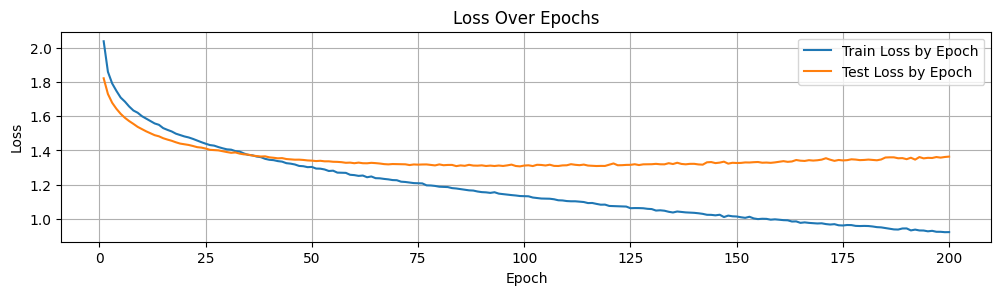

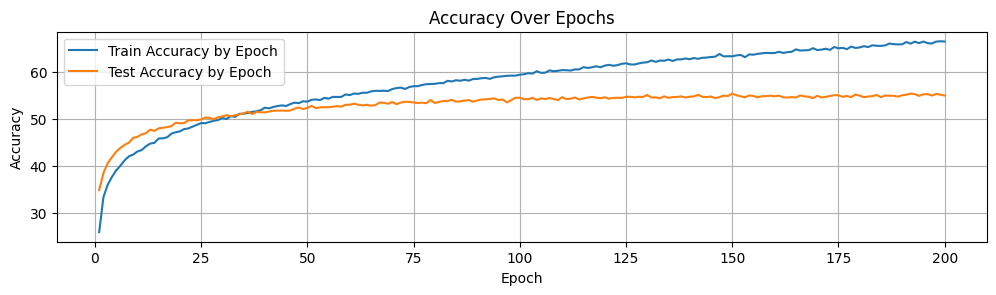

Accuracy: 54.97%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,61.6,61.0,38.4,32.6,52.7,45.6,67.4,58.3,70.1,62.0


In [ ]:
nl4=[50,200,1000,200,10]
nn_4L = Neural_Network_General_model(nl4,4,[False,False,False,False],[0,0.6,0,0],[nn.ReLU(),nn.ReLU(),nn.ReLU()]).to(device)
train_test_plot(nn_4L,200,0.0005,0.9,data_train,label_train,data_test,label_test,1000,False)


Epoch: 0 | Train Loss: 2.04046, Train Accuracy: 25.90% | Test Loss: 1.82337, Test Accuracy: 34.86%
Epoch: 10 | Train Loss: 1.58702, Train Accuracy: 43.37% | Test Loss: 1.51236, Test Accuracy: 46.69%
Epoch: 20 | Train Loss: 1.47656, Train Accuracy: 47.83% | Test Loss: 1.43250, Test Accuracy: 49.12%
Epoch: 30 | Train Loss: 1.40491, Train Accuracy: 49.98% | Test Loss: 1.38653, Test Accuracy: 50.78%
Epoch: 40 | Train Loss: 1.34340, Train Accuracy: 52.25% | Test Loss: 1.35732, Test Accuracy: 51.56%
Epoch: 50 | Train Loss: 1.29408, Train Accuracy: 54.07% | Test Loss: 1.33799, Test Accuracy: 52.77%
Epoch: 60 | Train Loss: 1.25116, Train Accuracy: 55.39% | Test Loss: 1.32893, Test Accuracy: 53.23%
Epoch: 70 | Train Loss: 1.21720, Train Accuracy: 56.55% | Test Loss: 1.32008, Test Accuracy: 53.12%
Epoch: 80 | Train Loss: 1.18678, Train Accuracy: 57.61% | Test Loss: 1.31367, Test Accuracy: 53.61%
Epoch: 90 | Train Loss: 1.15460, Train Accuracy: 58.65% | Test Loss: 1.30917, Test Accuracy: 54.11%
E

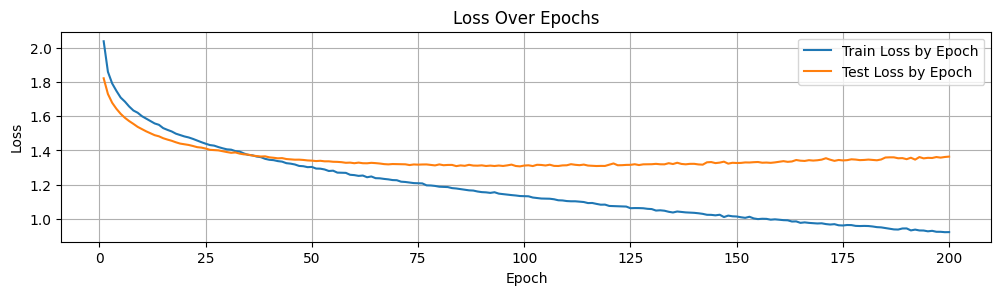

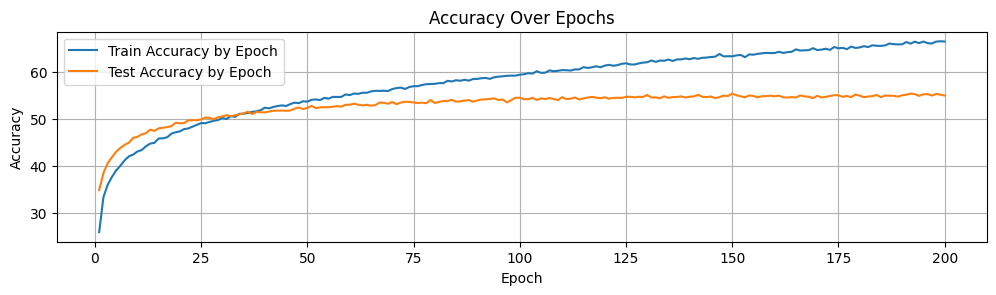

Accuracy: 54.97%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,61.6,61.0,38.4,32.6,52.7,45.6,67.4,58.3,70.1,62.0


In [ ]:
nl4=[50,200,1000,200,10]
nn_4L = Neural_Network_General_model(nl4,4,[False,False,False,False],[0,0.6,0,0],[nn.ReLU(),nn.ReLU(),nn.ReLU()]).to(device)
train_test_plot(nn_4L,200,0.0005,0.9,data_train,label_train,data_test,label_test,1000,False)


Epoch: 0 | Train Loss: 2.25901, Train Accuracy: 15.68% | Test Loss: 2.15597, Test Accuracy: 26.37%
Epoch: 10 | Train Loss: 1.73132, Train Accuracy: 37.75% | Test Loss: 1.64165, Test Accuracy: 41.28%
Epoch: 20 | Train Loss: 1.63806, Train Accuracy: 41.35% | Test Loss: 1.54504, Test Accuracy: 44.74%
Epoch: 30 | Train Loss: 1.58333, Train Accuracy: 43.48% | Test Loss: 1.49946, Test Accuracy: 46.41%
Epoch: 40 | Train Loss: 1.54453, Train Accuracy: 44.53% | Test Loss: 1.46352, Test Accuracy: 47.41%
Epoch: 50 | Train Loss: 1.51603, Train Accuracy: 45.88% | Test Loss: 1.43956, Test Accuracy: 48.28%
Epoch: 60 | Train Loss: 1.49502, Train Accuracy: 46.28% | Test Loss: 1.41973, Test Accuracy: 48.98%
Epoch: 70 | Train Loss: 1.47399, Train Accuracy: 47.22% | Test Loss: 1.40466, Test Accuracy: 49.49%
Epoch: 80 | Train Loss: 1.46096, Train Accuracy: 47.70% | Test Loss: 1.39537, Test Accuracy: 49.84%
Epoch: 90 | Train Loss: 1.44753, Train Accuracy: 48.12% | Test Loss: 1.38419, Test Accuracy: 50.21%


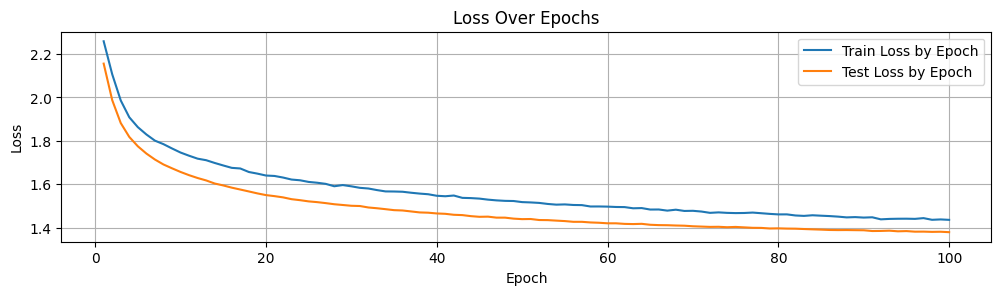

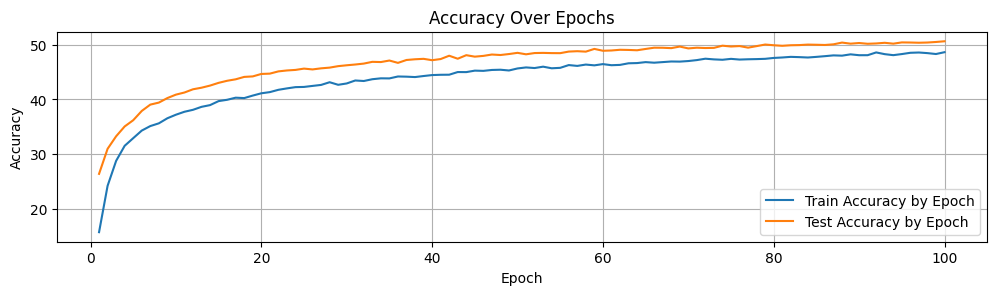

Accuracy: 50.67%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,54.6,62.3,28.1,33.1,40.0,41.8,62.4,57.9,67.8,58.7


In [106]:
nl4=[40,80,1000,50,10]
data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()
nn_4L = Neural_Network_General_model(nl4,4,[False,True,False,False],[0,0.8,0,0],[nn.ReLU(),nn.ReLU(),nn.ReLU()]).to(device)

train_test_plot(nn_4L,100,0.001,0.8,data_train,label_train,data_test,label_test,500,False)



In [19]:
data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()



In [ ]:
data_train, label_train = data_train_pca.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_pca.to(device), label_test_cifar10.to(device).long()


## Cross-Validation 5-fold σε μοντέλα MLP με 3 hidden layer 

Στόχος της παρούσας ενότητας ήταν να πραγματοποιήσουμε cross-validation 5-fold 3x3x3 μοντέλων τα οποία θα παρουσίαζαν διαφορά ως προς το πλήθος των νευρώνων των 3 hidden layers του νευρωνικού. Δυστυχώς, λόγω έλλειψης χρόνου δεν πρόλαβε να ολοκληρωθεί η εκτέλεση πριν την προθεσμία της εργασίας. Θα πειραμτιστούμε ξανά με αυτό στο μέλλον.

In [ ]:
import itertools

def cross_validation(fold,data_train,label_train,epochs):
    fold_size=int(len(data_train)/fold)
    loss_training_model=[]
    loss_validation=[]
    model_list=[]
    nl1=[50,100,200]
    nl2=[100,1000,10000]
    nl3=[30,50,80]
    grid = list(itertools.product(nl1, nl2, nl3))
    nl=[40,0,0,0,10]
    for m in range(len(grid)):
        nl[1:4]=grid[m]
        cvin=0
        mean_loss=0
        for i in range(fold):
            model=Neural_Network_model(nl).to(device)
            data_validation=data_train[cvin:fold_size+cvin]
            label_validation=label_train[cvin:fold_size+cvin]
            data_training_new=torch.cat((data_train[:cvin],data_train[fold_size+cvin:]))
            label_training_new=torch.cat((label_train[:cvin],label_train[fold_size+cvin:]))
            training_testing(model,epochs,0.0001,0.8,data_training_new,label_training_new,None,None,100,True)
            test_loss,test_acc =Testing_process(model,data_validation,label_validation,nn.CrossEntropyLoss())
            mean_loss+=test_loss
            cvin+=fold_size
        mean_loss=mean_loss/fold
        loss_validation.append(mean_loss) 
    index_of_smallest = loss_validation.index(min(loss_validation))
    loss_validation[index_of_smallest]
    print(loss_validation)
    return grid[index_of_smallest]
    

In [ ]:
best_layer_comb=cross_validation(5,data_train,label_train,1000)
print(best_layer_comb)


: 

In [ ]:
best_model=Neural_Network_model([nl[0],10000,nl[2]]).to(device)


Testing_process(best_model,data_test,label_test,nn.CrossEntropyLoss())

(tensor(2.3554, device='cuda:0'), tensor(11.2200, device='cuda:0'))

### Συνελικτικό Νευρωνικό Δίκτυο CNN με χρήση nn.Module της Pytorch

Αποφασίσαμε να υλοποίησουμε και ένα Συνελικτικό Νευρωνικό Δίκτυο διοτί διαβάσαμε πως παρουσιάζει υψηλή απόδοση στην επίλυση classification προβλημάτων όπου τα δεδομένα είναι οι εικόνες.
Η εικόνα της CIFAR-10 αποτελείται απο τα 3 κανάλια (R,G,B) όπου κάθε κανάλι έχει μια είκονα 32x32. Στα convolutional layers (συνελικτικά επίπεδα) τα γνωρίσματα εισόδου φιλτράρονται από φίλτρα-kernel ίσα σε αριθμό με τα γνωρίσματα εξόδου από το επίπεδο. Άμα τα κανάλια εισόδου είναι πολλαπλά το κάθε κανάλι-εικόνα εξόδου συνδυάζει το αποτέλεσμα της εφαρμογής του φίλτρου του σε όλα τα κανάλια εισόδου. Κατά αυτήν την διαδικασία δημιουργούμε εξάγουμε νέα γνωρίσματα από τις εικόνες βάση των οποίων εκπαιδεύεται το νευρωνικό ώστε να μπορεί να λύνει επιτυχώς το πρόβλημα κατηγοριοποίησης της cifar-10. 

Γιατί, χρησιμοποίησαμε στο convolution layer ,stride=1 και padding=1 οι εικόνες που προκύπτουν μετά την εφαρμογή του φίλτρου διατηρούν την διάσταση που είχαν στην είσοδο. Στη συνέχεια , υποδειγματοληπτούμε τις εικόνες στο επίπεδο δειγματοληψίας. Το αποτέλεσμα λόγω χρήσης kernel_size=2 και stride=2 είναι αν π.χ. η εικόνα εισόδου ειναι 32χ32 να μειωθεί η διάσταση της στο μισό δηλαδή 16χ16. Ακολουθήσαμε αυτό το απλό προτεινόμενο σχήμα , ως ένα πρώτο βήμα για την εξοικείωση με τα συνελικτικά νευρωνικά δίκτυα. 

Χρησιμοποίησαμε την ReLU ως συνάρτηση ενεργοποίησης καθώς είδαμε και πρωτύτερα στα mlp ότι μας έδινε καλή απόδοση αλλά είναι και αυτή που συνίσταται για classification problem με εικόνες. Όπως είπαμε ,στα πλεονεκτήματα της συμπεριλαμβάνει ότι δεν φτάνει στον κορεσμό και από τις δύο πλευρές όπως κάνει η sigmoid και η tanh. Αυτές, για μεγάλη απόλυτη τιμή στην είσοδο τους φτάνουν στον κορεσμό όπου η παράγωγος τους μηδενίζεται και επομένως δεν μπορούν να ενημερωθούν τα συναπτικά βάρη κατά την διαδικασία της οπισθοδιάδοσης. Αυτό, δεν συμβαίνει κατά ανάγκη στη ReLU καθώς για θετικές εισόδους η παράγωγος της είναι ίση με την μονάδα και επομένως δεν μηδενίζεται η τοπική κλίση δέλτα άρα και η κλίση του SGD για το συναπικό βάρος του νευρώνα. Επίσης, είναι και πιο απλή υπολογιστικά.

Τέλος μετά τα συνελικτικά επίπεδα (conv) και τα επίπεδα υποδειγματοληψίας (pool) έχουμε ένα MLP δίκτυο (ή απλά ένα fully connected layer) που ολοκληρώνει την διαδικασία της κατηγοριοποίησης. Καθώς η έξοδος του καθαρά συνελεκτικού δικτύου είναι εικόνα πρέπει να την κάνουμε flatten έτσι ώστε να έρθει σε μορφή διανύσματος και να εισέλθει στο MLP. Το MLP έχει 10 εξόδους , όσο και το πλήθος των κλάσεων και η απόφαση classification λαμβάνεται κατά τα γνωστά όπως ήδη έχει εξηγηθεί προηγουμένως.

Απαιτείται να γίνει reshape των δεδομένων της cifar-10 απο διανύσματα μήκους 3072 σε tensors διάστασης (3,32,32). Έτσι η είσοδος μπορεί να σπάσει για κάθε κανάλι στα τρία κανάλια όπου το κάθε κανάλι έχει την δική του εικόνα-γνώρισμα(32χ32). Αυτή η αλλαγή είναι απαραίτητη ώστε να μπορούν να εισέλθουν οι εικόνες στο συνελικτικό νευρωνικό δίκτυο.

In [20]:
image_data_train=torch.empty(len(data_train_cifar10),3, 32, 32) 
image_data_test=torch.empty(len(data_test_cifar10_np),3, 32, 32) 
for ind in range(len(data_train_cifar10)):
    image_data_train[ind] = data_train_cifar10[ind].reshape(3, 32, 32)
for ind in range(len(data_test_cifar10_np)):
    image_data_test[ind] = data_test_cifar10[ind].reshape(3, 32, 32)



## Convolutional Neural Network με 3 convolution layer (3->27,27->54,54->108), 3 pool layers (υπoδειγματοληψία ανά 2) , χρήση dropout μετά τα συνελικτικά και ένα τελευταίο στάδιο fully connected

Η εφαρμογή dropout layer δεν συστήνεται για τα νευρωνικά δίκτυα καθώς μπορεί να διαταράσει τα spatial features αλλά έγινε δοκιμή με την ελπίδα να μειωθεί το overfitting και άλλωστε χρησιμοποίηθηκε μικρή πιθανότητα p=0.3.

Epoch: 0 | Train Loss: 4.50869, Train Accuracy: 11.50% | Test Loss: 2.29789, Test Accuracy: 12.29%
Epoch: 10 | Train Loss: 1.56207, Train Accuracy: 44.40% | Test Loss: 1.67751, Test Accuracy: 47.20%
Epoch: 20 | Train Loss: 1.32413, Train Accuracy: 53.32% | Test Loss: 1.46329, Test Accuracy: 56.67%
Epoch: 30 | Train Loss: 1.24013, Train Accuracy: 56.48% | Test Loss: 1.37469, Test Accuracy: 60.04%
Epoch: 40 | Train Loss: 1.18309, Train Accuracy: 58.60% | Test Loss: 1.35881, Test Accuracy: 60.82%
Epoch: 50 | Train Loss: 1.13331, Train Accuracy: 60.43% | Test Loss: 1.29440, Test Accuracy: 62.61%
Epoch: 60 | Train Loss: 1.09248, Train Accuracy: 61.82% | Test Loss: 1.28374, Test Accuracy: 63.09%
Epoch: 70 | Train Loss: 1.06978, Train Accuracy: 62.46% | Test Loss: 1.22681, Test Accuracy: 64.78%
Epoch: 80 | Train Loss: 1.03243, Train Accuracy: 63.86% | Test Loss: 1.20829, Test Accuracy: 65.70%
Epoch: 90 | Train Loss: 1.00654, Train Accuracy: 64.56% | Test Loss: 1.19636, Test Accuracy: 66.47%
E

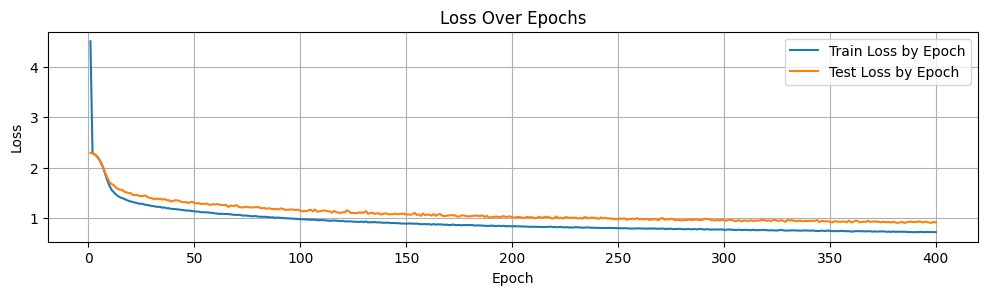

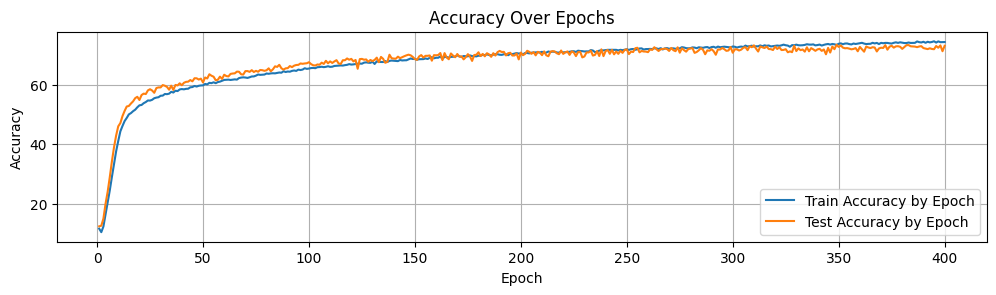

Accuracy: 73.31%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,77.9,88.1,69.3,58.1,73.1,48.0,83.2,74.6,84.5,76.3


In [ ]:
class CNN_v1(nn.Module):
    def __init__(self):
        super().__init__()
        # Συνελικτικά Επίπεδα
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=27, kernel_size=3, stride=1, padding=1)  # 3x3 μάσκα/φίλτρο->kernel
        self.conv2 = nn.Conv2d(in_channels=27, out_channels=54, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=54, out_channels=108, kernel_size=3, stride=1, padding=1)
        self.relu=nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)

        # Επίπεδο Υποδειγματοληψίας
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Υποδειγματοληψία / 2

        # MLP
        #self.fc1 = nn.Linear(108 * 4*4, 108)
        self.fc2 = nn.Linear(108 * 4*4, 10)  # 10 κλάσεις

    def forward(self, x):
        # Convolutional layers με ReLU, pooling και dropout
        x = self.pool(self.dropout(self.relu(self.conv1(x))))  #32χ32->16χ16
        x = self.pool(self.dropout(self.relu(self.conv2(x)))) #16χ16->8χ8
        x=self.pool(self.dropout(self.relu(self.conv3(x)))) #8χ8->4χ4

        # Flatten the output for the fully connected layers
        x = x.view(-1, 108 *4*4)  # Flatten

        # Fully connected layers
        #x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer
        return x



image_data_train=torch.empty(len(data_train_cifar10),3, 32, 32)
image_data_test=torch.empty(len(data_test_cifar10_np),3, 32, 32)
for ind in range(len(data_train_cifar10)):
    image_data_train[ind] = data_train_cifar10[ind].reshape(3, 32, 32)
for ind in range(len(data_test_cifar10_np)):
    image_data_test[ind] = data_test_cifar10[ind].reshape(3, 32, 32)



model_cnn_v1=CNN_v1().to(device)

epochs=400
data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

train_test_plot(model_cnn_v1,epochs,0.001,0.8,image_data_train.to(device),label_train,image_data_test.to(device),label_test,100,False)
#batch size=50.000/100=500

Χρόνος Εκπαίδευσης: Περίπου 1 ώρα.

Παρατηρούμε ότι αυξήθηκε σημαντικά το ποσοστό επιτυχούς κατηγοριοποίησης των δειγμάτων εικόνας με πλήρη γνωρίσματα features (3072) στο CNN σε σχέση με το MLP όπως και αναμέναμε θεωρητικά. Η αύξηση στο ποσοστό είναι μεγαλύτερη του 20 % και αφήνει αρκετά πίσω προφανώς τα ποσοστά του k-nn και nearest-centroid. 
Παρατηρούμε πάλι στα validation-test data μια εγκύτητα στην καμπύλη απωλείων λόγω των στρωμάτων dropout , τα οποία αν και ενεργούνε στα training_data (επηρρεάζοντας την έξοδο άρα και το loss) δεν ενεργούν στα test-validation data όπως αναφέραμε προηγουμένως. Επίσης εμφανές ρόλο παίζει και το batch size=500 το οποίο είναι σχετικά μεγάλο. Το θετικό της υπόθεσης είναι ότι δεν έχουμε overfit στα training data.

Ακολούθως θα δοκιμάσουμε να επεκτείνουμε το MLP στην έξοδο και να αφαιρέσουμε τα dropout layers ώστε να δούμε τα αποτέλεσματα στις καμπύλες εκπαίδευσης.

## Convolutional Neural Network με 3 convolution layer (3->27,27->54,54->108), 3 pool layers (υπoδειγματοληψία ανά 2) , χωρίς dropout μετά τα συνελικτικά και το MLP εξόδου να έχει ένα hidden layer χωρίς dropout στο MLP εξόδου.

In [ ]:
class CNN_v2(nn.Module):
    def __init__(self):
        super().__init__()
        # Συνελικτικά Επίπεδα
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=27, kernel_size=3, stride=1, padding=1)  # 3x3 μάσκα/φίλτρο->kernel
        self.conv2 = nn.Conv2d(in_channels=27, out_channels=54, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=54, out_channels=108, kernel_size=3, stride=1, padding=1)
        self.relu=nn.ReLU()
        #self.dropout = nn.Dropout(p=0.3) 

        # Επίπεδο Υποδειγματοληψίας 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Υποδειγματοληψία / 2
        
        # MLP
        self.fc1 = nn.Linear(108 * 4*4, 108)  
        self.fc2 = nn.Linear(108 , 10)  # 10 κλάσεις

    def forward(self, x):
        # Convolutional layers με ReLU, pooling και dropout
        x = self.pool(self.relu(self.conv1(x)))  #32χ32->16χ16
        x = self.pool(self.relu(self.conv2(x))) #16χ16->8χ8
        x=self.pool(self.relu(self.conv3(x))) #8χ8->4χ4
        
        # Flatten the output for the fully connected layers
        x = x.view(-1, 108 *4*4)  # Flatten 
        
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer
        return x


In [ ]:
model_cnn_v2=CNN_v2().to(device)


Epoch: 0 | Train Loss: 2.32172, Train Accuracy: 21.90% | Test Loss: 1.88654, Test Accuracy: 32.37%
Epoch: 10 | Train Loss: 1.09705, Train Accuracy: 61.63% | Test Loss: 1.15021, Test Accuracy: 59.40%
Epoch: 20 | Train Loss: 0.88318, Train Accuracy: 69.57% | Test Loss: 0.99929, Test Accuracy: 65.59%
Epoch: 30 | Train Loss: 0.74205, Train Accuracy: 74.53% | Test Loss: 0.93620, Test Accuracy: 68.21%
Epoch: 40 | Train Loss: 0.62289, Train Accuracy: 78.55% | Test Loss: 0.92354, Test Accuracy: 69.71%
Epoch: 50 | Train Loss: 0.53297, Train Accuracy: 81.68% | Test Loss: 0.97628, Test Accuracy: 69.41%
Epoch: 60 | Train Loss: 0.43914, Train Accuracy: 84.87% | Test Loss: 1.02749, Test Accuracy: 69.50%
Epoch: 70 | Train Loss: 0.35794, Train Accuracy: 87.74% | Test Loss: 1.12687, Test Accuracy: 68.75%
Epoch: 80 | Train Loss: 0.27723, Train Accuracy: 90.56% | Test Loss: 1.24950, Test Accuracy: 68.68%
Epoch: 90 | Train Loss: 0.20132, Train Accuracy: 93.54% | Test Loss: 1.42638, Test Accuracy: 68.32%
E

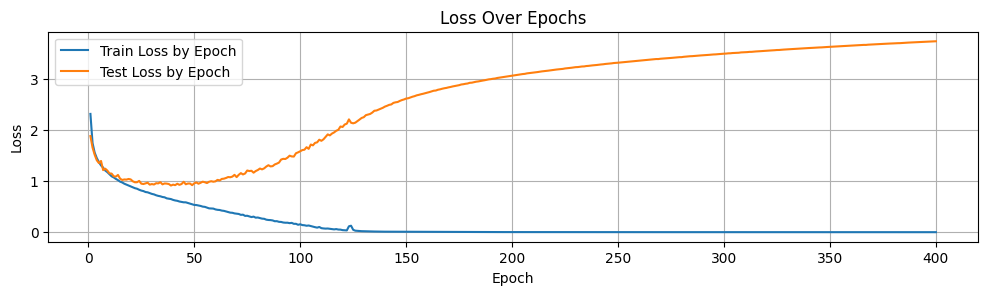

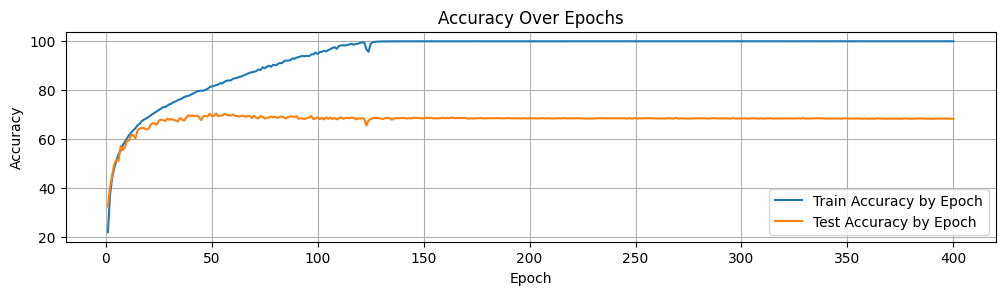

Accuracy: 68.26%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,72.9,78.4,55.8,50.0,62.6,56.6,77.0,72.7,79.7,76.9


In [ ]:

epochs=400
data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

train_test_plot(model_cnn_v2,epochs,0.001,0.8,image_data_train.to(device),label_train,image_data_test.to(device),label_test,100,False)


Ο χρόνος εκπαίδευσης : Περίπου μια ώρα.

Το αφήσαμε να τρέξει παραπάνω εποχές εδώ για να φανεί καλύτερα το overfit. Συγκεκριμένα εδώ λόγω απουσίας των dropout layers , δεν συμβαίνει η απαραίτητη κανονικοποίηση (dropout) που απαιτείται στα στρώματα που ενεργοποιείται απο την ReLU και κατά συνέπεια το μοντέλο κάνει overfit στα training data. Το ποσοστό επιτυχίας-accuracy στο validation (test) εχεί παρόμοια τιμή με προηγουμένως και παραμένει καλύτερο από τις τιμές που πετύχαμε για το MLP αλλά και στους K-nn και Nearest Centroid Classifiers.

Στη συνέχεια θα δούμε το ίδιο μοντέλο με την διαφορά ότι αφαιρούμε το hidden layer του MLP στην έξοδο. Επίσης θα κανούμε το batch size μικρότερο σε 50.000/1000=50 εικόνες /batch.

### Convolutional Neural Network με 3 convolution layer (3->27,27->54,54->108), 3 pool layers (υπoδειγματοληψία ανά 2) , χωρίς dropout μετά τα συνελικτικά και με ένα fully connected στρώμα εξόδου.

In [ ]:
class CNN_v3(nn.Module):
    def __init__(self):
        super().__init__()
        # Συνελικτικά Επίπεδα
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=27, kernel_size=3, stride=1, padding=1)  # 3x3 μάσκα/φίλτρο->kernel
        self.conv2 = nn.Conv2d(in_channels=27, out_channels=54, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=54, out_channels=108, kernel_size=3, stride=1, padding=1)
        self.relu=nn.ReLU()
        #self.dropout = nn.Dropout(p=0.3) 

        # Επίπεδο Υποδειγματοληψίας 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Υποδειγματοληψία / 2
        
        # MLP
        #self.fc1 = nn.Linear(108 * 4*4, 108)  
        self.fc2 = nn.Linear(108 * 4*4 , 10)  # 10 κλάσεις

    def forward(self, x):
        # Convolutional layers με ReLU, pooling και dropout
        x = self.pool(self.relu(self.conv1(x)))  #32χ32->16χ16
        x = self.pool(self.relu(self.conv2(x))) #16χ16->8χ8
        x=self.pool(self.relu(self.conv3(x))) #8χ8->4χ4
        
        # Flatten the output for the fully connected layers
        x = x.view(-1, 108 *4*4)  # Flatten 
        
        # Fully connected layers
       # x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer
        return x


In [ ]:
model_cnn_v3=CNN_v3().to(device)


Epoch: 0 | Train Loss: 1.86031, Train Accuracy: 35.30% | Test Loss: 1.70558, Test Accuracy: 44.81%
Epoch: 10 | Train Loss: 0.89185, Train Accuracy: 69.02% | Test Loss: 1.14671, Test Accuracy: 68.39%
Epoch: 20 | Train Loss: 0.67537, Train Accuracy: 76.19% | Test Loss: 0.91718, Test Accuracy: 72.24%
Epoch: 30 | Train Loss: 0.54619, Train Accuracy: 80.75% | Test Loss: 0.84971, Test Accuracy: 73.52%
Epoch: 40 | Train Loss: 0.46702, Train Accuracy: 83.41% | Test Loss: 0.78164, Test Accuracy: 74.64%
Epoch: 50 | Train Loss: 0.40028, Train Accuracy: 85.81% | Test Loss: 0.84412, Test Accuracy: 71.92%
Epoch: 60 | Train Loss: 0.35991, Train Accuracy: 87.34% | Test Loss: 0.77252, Test Accuracy: 74.16%
Epoch: 70 | Train Loss: 0.33108, Train Accuracy: 88.27% | Test Loss: 0.75172, Test Accuracy: 75.02%
Epoch: 80 | Train Loss: 0.29830, Train Accuracy: 89.75% | Test Loss: 0.78721, Test Accuracy: 74.20%
Epoch: 90 | Train Loss: 0.27664, Train Accuracy: 90.58% | Test Loss: 0.76458, Test Accuracy: 75.47%


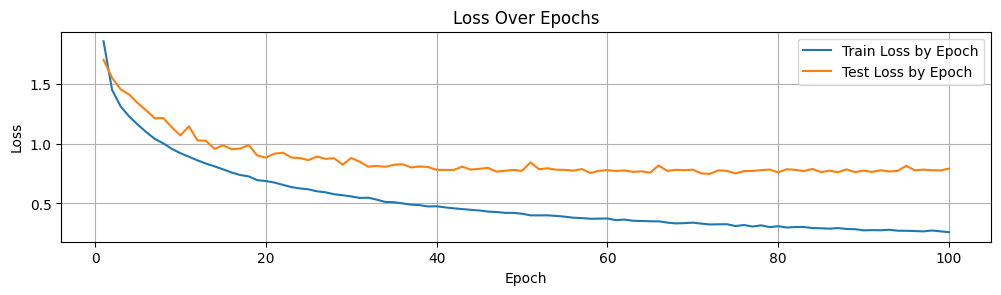

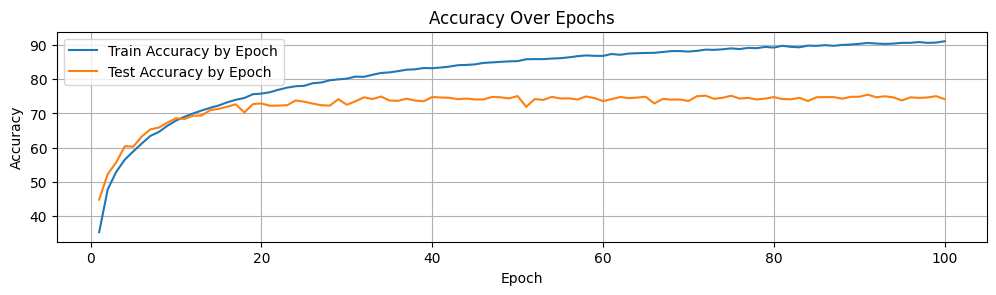

Accuracy: 74.14%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,72.8,86.6,66.1,66.3,68.3,56.8,76.6,78.0,84.2,85.7


In [ ]:

epochs=100
data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()


train_test_plot(model_cnn_v3,epochs,0.001,0.8,image_data_train.to(device),label_train,image_data_test.to(device),label_test,1000,False)


Χρόνος Εκπαίδευσης: 15 λεπτά.

Το ποσοστό accuracy του validation set είναι ανάλογο του CNN_V1. Η διαφορά έγκειται ότι χωρίς την ύπαρξη του dropout layer στα convolutional layers το μοντέλο οδηγείται σύντομα σε overfit στα training data.

Διασταυρώνοντας όλα τα παραπάνω καταληγούμε ότι για να μην έχουμε overfit αλλά και να πετύχουμε καλό ποσοστό accuracy στο test-validation set πρέπει να βάλουμε dropout layers και στα convolutional layers καθώς και στο hidden layer του MLP εξόδου. Μετά απο κατάλληλο tuning καταλήξαμε ότι βολεύει να αυξήσουμε και τον αριθμό των features-φίλτρων στα convolutional layers κατά λίγο ώστε να εκμεταλλευτούμε περισσότερα κρυφά γνωρίσματα της εικόνας.

### Convolutional Neural Network με 3 convolution layer (3->30,30->60,60->120), 3 pool layers (υπoδειγματοληψία ανά 2) , χρήση dropout μετά τα συνελικτικά και στην έξδοδο ένα MLP με hidden layer(120x4x4->120) με dropout p=0.6 (πιο καλό για τα fully connected layers) και επίπεδο εξόδου (120->10) χωρίς ενεργοποίηση.

In [23]:
class CNN_v4(nn.Module):
    def __init__(self):
        super().__init__()
        # Συνελικτικά Επίπεδα
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=30, kernel_size=3, stride=1, padding=1)  # 3x3 μάσκα/φίλτρο->kernel
        self.conv2 = nn.Conv2d(in_channels=30, out_channels=60, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=60, out_channels=120, kernel_size=3, stride=1, padding=1)
        self.relu=nn.ReLU()
        self.dropout = nn.Dropout(p=0.3) 
        self.dropout_mlp=nn.Dropout(p=0.6)

        # Επίπεδο Υποδειγματοληψίας 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Υποδειγματοληψία / 2
        
        # MLP
        self.fc1 = nn.Linear(120 * 4*4, 120)  
        self.fc2 = nn.Linear(120, 10)  # 10 κλάσεις

    def forward(self, x):
        # Convolutional layers με ReLU, pooling και dropout
        x = self.pool(self.dropout(self.relu(self.conv1(x))))  #32χ32->16χ16
        x = self.pool(self.dropout(self.relu(self.conv2(x)))) #16χ16->8χ8
        x=self.pool(self.dropout(self.relu(self.conv3(x)))) #8χ8->4χ4
        
        # Flatten the output for the fully connected layers
        x = x.view(-1, 120 *4*4)  # Flatten 
        
        # Fully connected layers
        x = self.dropout_mlp(self.relu(self.fc1(x)))
        x = self.fc2(x)  # Output layer
        return x


In [24]:
model_cnn_v4=CNN_v4().to(device)


Epoch: 0 | Train Loss: 1.96662, Train Accuracy: 26.89% | Test Loss: 1.77637, Test Accuracy: 43.35%
Epoch: 10 | Train Loss: 1.14391, Train Accuracy: 59.93% | Test Loss: 1.14709, Test Accuracy: 66.92%
Epoch: 20 | Train Loss: 0.93726, Train Accuracy: 67.75% | Test Loss: 0.95252, Test Accuracy: 71.44%
Epoch: 30 | Train Loss: 0.83705, Train Accuracy: 71.35% | Test Loss: 0.83974, Test Accuracy: 75.04%
Epoch: 40 | Train Loss: 0.75921, Train Accuracy: 73.85% | Test Loss: 0.77516, Test Accuracy: 76.28%
Epoch: 50 | Train Loss: 0.71912, Train Accuracy: 75.09% | Test Loss: 0.76756, Test Accuracy: 76.90%
Epoch: 60 | Train Loss: 0.66948, Train Accuracy: 76.95% | Test Loss: 0.70215, Test Accuracy: 78.13%
Epoch: 70 | Train Loss: 0.65078, Train Accuracy: 77.53% | Test Loss: 0.71997, Test Accuracy: 77.56%
Epoch: 80 | Train Loss: 0.61537, Train Accuracy: 78.85% | Test Loss: 0.71654, Test Accuracy: 77.14%
Epoch: 90 | Train Loss: 0.59435, Train Accuracy: 79.25% | Test Loss: 0.66145, Test Accuracy: 79.38%


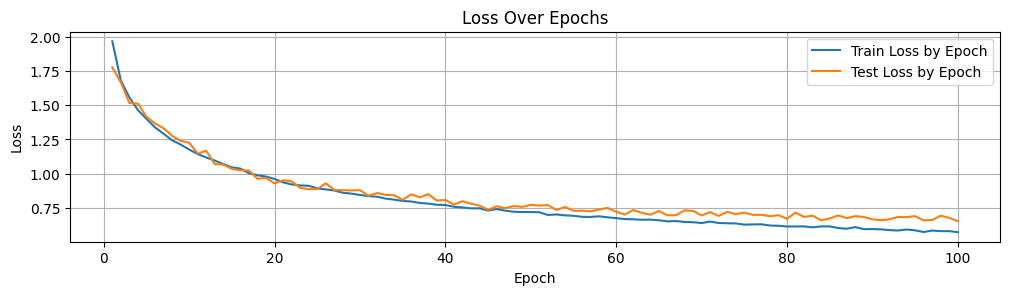

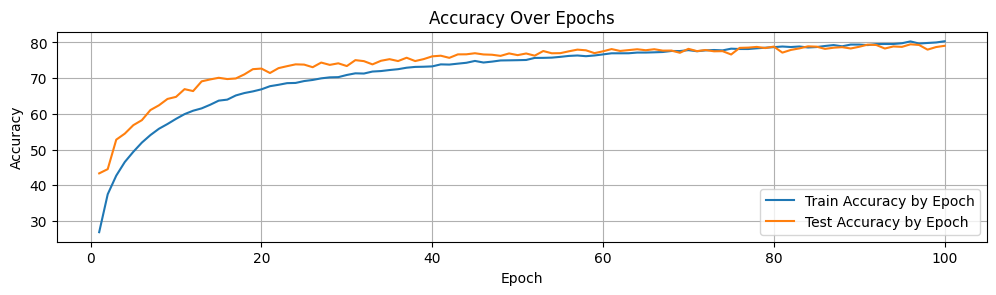

Accuracy: 79.05%
Success of each classification: 


,Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck
0,80.4,91.0,67.4,68.1,78.4,65.9,83.4,82.0,88.5,85.4


In [25]:
epochs=100
data_train, label_train = data_train_cifar10.to(device), label_train_cifar10.to(device).long()
data_test, label_test = data_test_cifar10.to(device), label_test_cifar10.to(device).long()

train_test_plot(model_cnn_v4,epochs,0.001,0.8,image_data_train.to(device),label_train,image_data_test.to(device),label_test,1000,False)


Χρόνος Εκπαίδευσης περίπου 15 λέπτα.

Παρατηρούμε ότι εδώ το ποσοστό επιτυχίας accuracy στην κατηγοριοποίηση του validation-test set φτάνει στο 79.05%. Αυτό είναι ακόμα καλύτερο από πριν και οφείλεται στην αύξηση των χαρτών χαρακτηριστικών-features-εικόνες στα convolutional layers αλλά και στην προσθήκη του hidden layer στο mlp εξόδου. Χαρής τα dropout layer αποφεύγεται το overfitting στα training data και παίρνουμε ένα αρκετά ικανό μοντέλο με ποσοστό επιτυχίας στο classification του test set κοντά στο 80 %. 

Σαφώς, τα CNN και ειδικά ο συνδιασμός του CNN με MLP 1 hidden layer μας έδωσαν καλύτερα ποσοστά επιτυχίας από ότι μας έδωσαν τα MLP που αναπτύξαμε και οι classifers Nearest Neighbour (με k=1,3 γείτονες) και Nearest Class Centroid.

### <center> Συμπεράσματα </center>

Γενικά , για όλα τα νευρωνικά δίκτυα που αναπτύχθηκαν στη παρούσα εργασία φάνηκε πως λύνουνε πολύ αποτελεσματικότερα το πρόβλημα κατηγοριοποίησης εικονών της cifar-10 από ότι οι ταξινομητές της προηγούμενης εργασίας. Το συμπέρασμα αυτό είναι αρκετά λογικό καθώς τα νευρωνικά δίκτυα είναι εξαιρετικά πιο σύνθετα μοντέλα μάθησης-classifier και επομένως είναι ικανά να λύσουν καλύτερα πιο πολύπλοκα classification problems.

Επισημαίνεται επίσης ότι γενικά η κατηγοριοποίηση των εικονών οχημάτων και ιδιαίτερα του πλοίου παρουσιάζαν υψηλά ποσοστά επιτυχίας ενώ εικόνες με γάτες , σκύλους και πουλία παρουσίασαν χαμηλά ποσοστά .

Ειδάμε επιπλέον πως οι διάφοροι υπερπαράμετροι (learning rate, momentum) καθώς και η ίδια η αρχιτεκτονική του νευρωνικού δικτύου και οι δικοί τους υπαρπαράμετροι (αριθμός νευρώνων στα κρυφά επίπεδα και ο αριθμός των κρυφών επιπέδων) επηρρεάζουν την ταχύτητα, ευστάθεια και επίτυχια ως προς την γενίκευση του νευρωνικού δικτύου.

Δυστυχώς, λόγω περιορισμένου χρόνου δεν μπόρεσα να δοκιμάσω πολλές μεθόδους και κόλπα στο δικό μου νευρωνικό (weight decay, χρήση adam optimizer ή και χρήση Confusion matrix). Θα δοκιμάσουμε να πειραματιστούμε με αυτά και μετά την παράδοση αυτής της αναφοράς-εργασίας.